# ClineHelpR BGC Tutorial

ClineHelpR allows you to plot BGC (Bayesian Genomic Cline) output. After we ran BGC, we realized it wasn't easy to plot the BGC results, so we put together this package in the process of figuring it out.

Our package provides tools for running BGC as well as pre- and post-processing its input and output files. The pipeline spans from input file conversion to plotting results, identifies outliers from the BGC output files, and allows you to make numerous highly customizable, publication-quality plots.

ClineHelpR also provides INTROGRESS tools spanning input file conversion and parsing and plotting the results. Finally, ClineHelpR provides tools for performing ecological niche modeling to correlate environmental variables with the INTROGRESS output. 

The BGC and INTROGRESS software packages are described elsewhere (Gompert and Buerkle, 2010, 2011, 2012; Gompert et al., 2012a, 2012b).

## Software Flow Diagram

<img src="img/flowchart_ClinePlotR.png" width=100% height=100% />

## Example Dataset

All example data are available from a Dryad Digital Repository (https://doi.org/10.5061/dryad.b2rbnzsc8), as the files are too large for GitHub. To run the example data, download the exampleData directory from DRYAD, then run the R scripts in the ClineHelpR/scripts directory.

**NOTE**: For all the analyses below, we will use the example dataset. The current working directory is ```/home/user/app/notebooks```, and we will place the example data in ```"../data/exampleData"```. ```../data``` and ```notebooks``` are volumes that are automatically created for you in the docker container, and they allow you to interface between your host system and the docker container. When you run docker, create a directory to keep the input and output, and create subdirectories in it called ```data/```, ```notebooks/```, and ```results/```.

## Installation

See the GitHub README page for installation instructions.  

## Pipeline

There are R and python scripts in the ClineHelpR/scripts directory that allow you to run our whole pipeline. All the steps from below can be run by modifying and using those scripts. We also demonstrate each step in this tutorial.

## Step 1: Data Filtering (optional)  

Data filtering is important for reducing noise and keeping uninformative sites from swamping out real signals in the data. We therefore recommend applying missing data and minor allele frequency filters. Additionally, non-biallelic sites should be removed because BGC assumes that all sites are bi-allelic. While filtering the data is outside the scope of ClineHelpR, below is a link to a GitHub Repository containing two scripts, *nremover.pl* and *phylipFilterPops.pl*, that can be used for appropriate data filtering.

https://github.com/tkchafin/scripts

+ *nremover.pl* applies per-individual and per-site missing data filters, bi-allelic, and minor allele frequeny filters.
+ *phylipFilterPops.pl* can apply missing data filtering per-population. 

There are also numerous other useful file conversion scripts in this repository that you might be interested in using. If you are using docker, the filtering scripts are included in the ```$HOME/app/src/scripts``` directory and are already in your path.

Additionally, our ```genind2introgress()``` and ```genind2bgc()``` ClineHelpR functions can perform per-individual and per-site filtering to remove individuals or sites that exceed a specified missing data threshold.

## Step 2: File Conversion

The input data must be converted to the custom BGC file format. ClineHelpR provides three different ways to convert standard file formats to BGC and INTROGRESS format. 

### VCF to BGC

ClineHelpR includes a Python script to convert a VCF (variant call format) file to BGC format. It is already in your path if you are using docker.

+ ClineHelpR/scripts/*vcf2bgc.py* Convert VCF file to BGC format

**NOTE**: VCF formats are highly variable. vcf2bgc.py has thus far only been tested with the formats output by ipyrad and stacks.

Let's demonstrate its usage. First we will pull up the help menu to show the available and required options.

In [1]:
%%bash

# Bring up help menu
vcf2bgc.py -h

usage: vcf2bgc.py -v VCF -m POPMAP --p1 P1 --p2 P2 --admixed ADMIXED
                  [-o OUTPREFIX] [-l] [-h]

Convert VCF file to BGC format (with genotype uncertainties). Currently only
handles three populations maximum (P1, P2, and Admixed).

Required Arguments:
  -v VCF, --vcf VCF     Input VCF file
  -m POPMAP, --popmap POPMAP
                        Two-column tab-separated population map file: inds
                        pops. No header line.
  --p1 P1               Parental population 1
  --p2 P2               Parental population 2
  --admixed ADMIXED     Admixed population (limit=1 population)

Optional Arguments:
  -o OUTPREFIX, --outprefix OUTPREFIX
                        Specify output prefix for BGC files.
  -l, --linkage         Toggle to create a linkage map file for BGC's linkage
                        model. Only use if you have a reference-mapped VCF
                        file; default = off.
  -h, --help            Displays this help menu


#### Required Arguments - VCF Input File

The VCF input file is required. Its path can be specified with the ```-v``` or ```--vcf``` arguments.

#### Required Arguments - Population Map (Popmap) File

The popmap (population map) file (```-m``` option) contains two columns separated by a tab. The first column should contain sampleIDs for each individual in the dataset. The second column should contain the population IDs for each sample.  There should not be a header line. 

For example: 

```
Ind1    parent1
Ind2    parent1
Ind3    parent1
Ind4    parent2
Ind5    parent2
Ind6    parent2
Ind7    admix
Ind8    admix
Ind9    admix
```

Let's look at the population map file that we will be using in the analyses below.

In [1]:
%%bash

cat ../data/exampleData/popmaps/bgc/eatt.bgc.popmap_final.txt

EAAL_BX1380	EATT
EAAL_BX1387	EATT
EAAL_BX211	EATT
EAAL_BXEA27	EATT
EAGA_BX217	EATT
EAGA_BX219	EATT
EAGA_BX220	EATT
EAGA_BX301	EATT
EAGA_BX346	EATT
EAGA_BX472	EATT
EAGA_BX473	EATT
EAGA_BX660	EATT
EAGA_BXEA14	EATT
EAGA_BXEA15_654	EATT
EAGA_BXEA17	EATT
EAGA_BXEA19	EATT
EAGA_BXEA21	EATT
EAGA_BXEA25	EATT
EAGA_BXEA26	EATT
EAGA_BXEA29_655	EATT
EAGA_BXEA31_659	EATT
EAGA_BXEA32_662	EATT
EAGA_BXEA33_663	EATT
EAGA_BXEA34_665	EATT
EAGA_BXEA35_666	EATT
EAGA_BXEA49_564	EATT
EAKY_BX26	EATT
EAKY_BX27	EATT
EANC_BX316	EATT
EANC_BX318	EATT
EANY_BXEA11	EATT
EAPA_BXEA13	PureEA
EASC_BX1108	EATT
EASC_BX1109	EATT
EASC_BX1110	EATT
EASC_BX1111	EATT
EASC_BX1112	EATT
EASC_BX1114	EATT
EASC_BX1115	EATT
EASC_BX1116	EATT
EASC_BX231	EATT
EASC_BX232	EATT
EASC_BXEA40_1304	EATT
EASC_BXEA41_1305	EATT
EASC_BXEA42_1306	EATT
EASC_BXEA43_1307	EATT
EATN_BX35	EATT
EATN_BXEA02_36x2	PureEA
EAVA_BX101	PureEA
EAVA_BX103	PureEA
EAVA_BX104	PureEA
EAVA_BX320	PureEA
EAVA_BX321	PureEA
EAWV_BX449	PureEA
TCAL_BX1618	EATT
TCAL_BX271	EATT
T

The parental populations, p1 and p2, should be identified with the ```--p1``` and ```--p2``` arguments, and the admixed population should be identified with the ```--admixed``` arguments. E.g., 

```vcf2bgc.py -v <INPUT_VCF_FILE> -m POPMAP_FILE --p1 parent1 --p2 parent2 --admixed admix```

#### Optional Arguments

An output prefix can be specified with the ```-o, --outprefix``` option. Finally, if you want to generate a linkage map file, use the ```-l, --linkage``` option. You should only use this if you have mapped your loci to a reference genome and the VCF file contains coordinates for the mapping.

Below we run vcf2bgc.py on the example dataset.

In [9]:
%%bash

vcf2bgc.py -v ../data/test.vcf -m ../data/test.popmap --p1 PureEA --p2 PureTT --admixed EATT --linkage -o test



P1 population has 8 individuals...

P2 population has 8 individuals...

Admixed populalation has 85 individuals...


Processing 233 records in VCF file...


DONE!




### BGC Input Files

vcf2bgc.py will output several files to be used as input for BGC.

#### p0in.txt file

We ran vcf2bgc.py on one of the example data files. Let's look at the output files by displaying the first five loci.
First is the test_p0in.txt file. The filename will have the suffix ```*_p0in.txt```.

In [10]:
%%bash

# Display the first 5 loci
head -n 45 test_p0in.txt

locus_1
0  0
13  0
122  0
0  0
0  0
152  0
107  0
0  0
locus_2
44  0
51  0
0  0
13  0
24  0
93  0
110  0
29  0
locus_3
44  0
51  0
0  0
13  0
24  0
93  0
110  0
29  0
locus_4
13  0
62  0
167  0
0  0
12  0
136  0
131  0
9  0
locus_5
14  0
58  0
0  0
6  0
34  0
0  0
0  0
28  0


#### p1in.txt file

The numbers correspond to the read counts so that the genotype uncertainty model can be used with BGC. vcf2bgc.py reads the allele counts and puts them in the BGC file. Let's look at test_p1in.txt. The filename will have the suffix ```*_p1in.txt```.

In [6]:
%%bash

# Look at first 5 loci
head -n 45 test_p1in.txt

locus_1
47  0
12  8
27  0
68  62
180  0
141  0
83  0
53  49
locus_2
0  131
0  64
0  0
0  59
0  89
2  175
0  90
1  112
locus_3
0  131
0  64
0  0
0  59
0  89
0  178
0  90
0  113
locus_4
98  0
0  10
46  71
191  0
143  119
87  77
70  39
105  1
locus_5
47  0
105  0
54  0
64  0
242  0
0  0
119  0
113  0


#### admixedin.txt file

The admixed file is the same format and will have the suffix ```*_admixedin.txt```.

Let's look at the first 10 lines.

In [13]:
%%bash

head -n 10 test_admixedin.txt

locus_1
pop_0
0  0
0  0
0  0
29  0
0  0
0  0
6  0
74  1


#### Loci File

This file is a two-column whitespace-separated file with locus ID as column 1 and SNP position as column 2.  

Here is an example what it should look like: 

In [11]:
%%bash

head -n 6 test_loci.txt

#CHROM POS
XM_024192520.2 889
XM_024192634.2 2133
XM_024192634.2 2140
XM_024192715.1 388
XM_024192906.1 496


Each line is one locus.  

The first column indicates transcript or scaffold ID. The second indicates the SNP position on the scaffold or mRNA. So you need physical scaffold coordinates for the unplaced scaffolds, and transcriptome coordinates for the transcriptome-aligned dataset.

If you don't have this information, ClineHelpR will detect that you don't and create a spoof one automatically. It isn't used by the phiPlot and alphaBetaPlot functions, so it won't affect those. You just won't be able to make the chromosome plots if you don't have locus information.

#### Linkage Map File (Optional)

Let's look at the linkage map file, if you chose to have vcf2bgc.py make one. It will have the suffix ```*_map.txt```.

In [7]:
%%bash

# First 10 loci
head -n 10 test_map.txt

locus_1 1 1.00000000000000000000
locus_2 2 0.00000000000000000000
locus_3 2 1.00000000000000000000
locus_4 3 1.0
locus_5 4 1.0
locus_6 5 0.00000000000000000000
locus_7 5 0.59999999999999997780
locus_8 5 0.80000000000000004441
locus_9 5 1.00000000000000000000
locus_10 6 1.0


#### GENIND to BGC and Introgress

Alternatively, ClineHelpR includes two R functions that can convert genind objects to BGC or INTROGRESS formats. However, keep in mind that these R functions do not currently calculate read counts for the genotype uncertainty model. They do have built-in per-individul, per-site, and bi-allelic filters though. 

To start using R in a Jupyter Notebook, you'll need to switch the kernel from Python to R, as shown in the images above (see Running the Jupyter Notebook section).

Let's demonstrate their usage.

In [2]:
# Load CLineHelpR
library("ClineHelpR")
library("adegenet") # For loading a genind object

Loading required package: ade4

Registered S3 method overwritten by 'spdep':
  method   from
  plot.mst ape 


   /// adegenet 2.1.4 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()





To get a genind object, we will read a STRUCTURE formatted file with the adegenet ```read.structure()``` function. Check the adegenet documentation for more information on the arguments used in read.structure. Note that there are many other ways to convert various file formats to a genind object.

In [3]:
# Read a STRUCTURE file to a genind object.
genind <- read.structure(file = "../data/exampleData/bgc/bgc_structureFiles/eatt.str", n.ind = 101, n.loc = 233, onerowperind = FALSE, col.lab = 1, col.pop = 2, row.marknames = 1, NA.char = -9)
head(genind[,1:5]) # print the genind object for first few loci and alleles.


 Which other optional columns should be read (press 'return' when done)? 
 Converting data from a STRUCTURE .stru file to a genind object... 



/// GENIND OBJECT /////////

 // 1 individual; 3 loci; 5 alleles; size: 6.2 Kb

 // Basic content
   @tab:  1 x 5 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 1-2)
   @loc.fac: locus factor for the 5 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: .local(x = x, i = i, j = j, drop = drop)

 // Optional content
   @pop: population of each individual (group size range: 1-1)

The population IDs were present in the STRUCTURE file as integers. Population 1 is the admixed population, Population 2 is P0, and Population 3 is P1.

Now you can use ClineHelpR to convert genind to BGC or Introgress format.

In [4]:
genind$pop

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
Levels: 1 2 3

In [5]:
genind2bgc(gen = genind, p1 = 2, p2 = 3, admix = 1, missingPerLoc = 0.5, missingPerInd = 0.9, prefix = "test_gt_known")

[1] "Locus SNP_2 not biallelic. Skipping."
[1] "Locus SNP_3 not biallelic. Skipping."
[1] "Locus SNP_6 not biallelic. Skipping."
[1] "Locus SNP_12 not biallelic. Skipping."
[1] "Locus SNP_21 not biallelic. Skipping."
[1] "Locus SNP_22 not biallelic. Skipping."
[1] "Locus SNP_23 not biallelic. Skipping."
[1] "Locus SNP_27 not biallelic. Skipping."
[1] "Locus SNP_30 not biallelic. Skipping."
[1] "Locus SNP_32 not biallelic. Skipping."
[1] "Locus SNP_41 not biallelic. Skipping."
[1] "Locus SNP_45 not biallelic. Skipping."
[1] "Locus SNP_50 not biallelic. Skipping."
[1] "Locus SNP_52 not biallelic. Skipping."
[1] "Locus SNP_53 not biallelic. Skipping."
[1] "Locus SNP_57 not biallelic. Skipping."
[1] "Locus SNP_61 not biallelic. Skipping."
[1] "Locus SNP_63 not biallelic. Skipping."
[1] "Locus SNP_64 not biallelic. Skipping."
[1] "Locus SNP_67 not biallelic. Skipping."
[1] "Locus SNP_69 not biallelic. Skipping."
[1] "Locus SNP_71 not biallelic. Skipping."
[1] "Locus SNP_73 not biallelic. Sk

genind2bgc outputs the necessary BGC formatted files. Let's look at what it output. We will switch to the Python 3 kernel here.

In [1]:
%%bash

ls

ClineHelpR_tutorial.ipynb
img
test_admixedin.txt
test_gt_known_admixedin.txt
test_gt_known_p0in.txt
test_gt_known_p1in.txt
test_loci.txt
test_map.txt
test_p0in.txt
test_p1in.txt


The ```genind2bgc()``` output files have the prefix ```test_gt_known``` and the necessary suffixes. Let's look at the first 5 loci of one of them.

In [2]:
%%bash

# Get first 5 loci
head -n 10 test_gt_known_p0in.txt

locus_SNP_1
2 0
locus_SNP_4
2 0
locus_SNP_5
2 0
locus_SNP_7
1 1
locus_SNP_8
1 1


You might have noticed that this output is in a different format than the output of *vcf2bgc.py*. That's because ```genind2bgc()``` outputs the genotypes-known format, whereas *vcf2bgc.py* calculates read counts for each individual and uses the genotype uncertainty model. If you require the genotype uncertainty model, you should use the vcf2bgc.py script. If you want the genotypes-known model, use the ```genind2bgc()``` R function. 

See the BGC manual for more information.

## Step 3: Run BGC

We are going to run a quick subset of loci just to demonstrate running BGC. However, note that the full output can be found in the example data (see Example Data section above).

To run BGC, we can use the included ```run_bgc.sh``` script. If you are using docker, it is already in your path. Otherwise, it can be found in the ClineHelpR/scripts directory. Let's run BGC with the first five loci.

NOTE: You need to be using the Python 3 kernel for this part.

In [6]:
%%bash

# Pull up the help menu
run_bgc.sh -h

Run bgc and estpost.

Usage: run_bgc.sh -s <PATH_TO_BGC_SETTINGS_FILE>

Options:
-h     Print this help menu.
-s     Path to BGC settinigs file.



The BGC settings file can be found in the ClineHelpR/scripts directory. Change the values and settings according to your needs. Here is what the file looks like.

In [7]:
%%bash

cat ../src/scripts/bgc_settings.txt

# BGC parameter settings
# See the BGC manual for more information

# Directory where bgc and estpost executables are located
BGC_PATH=$HOME/app/src/bgcdist

ESTPOST_PATH=$HOME/app/src/bgcdist

# Directory where input files are located
# Input files should have the correct suffixes. See documentation.
INPUT_DATA_DIR=$HOME/app/data

# Directory where output files will be saved
RESULTS_DIR=$HOME/app/results

# Run number (integer)
run=1

# Prefix for input and output files (string)
prefix=test

# Number of MCMC generations (integer)
mcmc=100000

# MCMC burnin generations (integer)
burnin=50000

# Thin MCMC to every $thin generations (integer)
thin=24

# gt_uncert: 0 if not using gt_uncert, 1 if using it (boolean integer)
gt_uncert=1

# error: Error rate for genotype_uncertainty model (float)
error=0.001

# Linkage: 0 for no linkage model, 1 for linkage model (boolean integer)
linkage=0

# Maximum distance between loci, free recombination. Only used for linkage model (default=0.5)
linkage

Note that the Run Number setting allows you to perform multiple BGC runs simultaneously in the same directory. The output files will have the run number appended to the end of the filename. This is useful for assessing convergence among runs. If you are doing e.g. five runs, you'll need to have five bgc_settings.txt files, each with a different run number.

Let's run BGC on the first five loci to demonstrate. We will use the genotype uncertainty model with the files output from *vcf2bgc.py*

In [9]:
%%bash

# Get the first 5 loci. Must have the correct suffixes.
head -n 45 test_p0in.txt > test_subset_p0in.txt
head -n 45 test_p1in.txt > test_subset_p1in.txt
head -n 435 test_admixedin.txt > test_subset_admixedin.txt
head -n 6 test_loci.txt > test_subset_loci.txt

# Change the prefix name from test to test_subset in the bgc_settings file.
sed 's/prefix=test/prefix=test_subset/' ../src/scripts/bgc_settings.txt > ./bgc_settings_subset.txt

# Change the location of the input data directory to the current working directory.
sed -i 's,INPUT_DATA_DIR=$HOME/app/data,INPUT_DATA_DIR=$HOME/app/notebooks,' ./bgc_settings_subset.txt

# Run BGC and estpost
run_bgc.sh -s ./bgc_settings_subset.txt

Running BGC. Results will be located in the /home/user/app/results/ directory...
Done running BGC!
Running estpost; Results will be located in the /home/user/app/results/ directory
parameter dimensions for LnL: samples = 2083
parameter dimensions for alpha: loci = 5, samples = 2083, pouplations = 1
parameter dimensions for beta: loci = 5, samples = 2083, pouplations = 1
parameter dimensions for hi: individuals = 85, samples = 2083
parameter dimensions for gamma-quantile: loci = 5, samples = 2083
parameter dimensions for zeta-quantile: loci = 5, samples = 2083
Done with estpost!


Reading input files
Number of loci: 5
Number of admixed populations: 1
Number of individuals: 85
Allowing for uncertainty in allele counts
Allocating memory
Initializing MCMC chain
Initialization complete
mcmc iteration: 0 ........ LnL: -428.137
mcmc iteration: 1000 ........ LnL: -366.957
mcmc iteration: 2000 ........ LnL: -352.859
mcmc iteration: 3000 ........ LnL: -331.151
mcmc iteration: 4000 ........ LnL: -337.083
mcmc iteration: 5000 ........ LnL: -348.028
mcmc iteration: 6000 ........ LnL: -343.612
mcmc iteration: 7000 ........ LnL: -355.1
mcmc iteration: 8000 ........ LnL: -339.183
mcmc iteration: 9000 ........ LnL: -352.159
mcmc iteration: 10000 ........ LnL: -329.22
mcmc iteration: 11000 ........ LnL: -350.255
mcmc iteration: 12000 ........ LnL: -348.301
mcmc iteration: 13000 ........ LnL: -340.769
mcmc iteration: 14000 ........ LnL: -352.196
mcmc iteration: 15000 ........ LnL: -351.059
mcmc iteration: 16000 ........ LnL: -381.043
mcmc iteration: 17000 ........ LnL: -342.159
m

BGC finished. Let's check the output files. They were output to the directory specified in bgc_settings_subset.txt.

In [10]:
%%bash

ls ../results/test_subset*

../results/test_subset_mcmcout_1.hdf5
../results/test_subset_stat_a0_1
../results/test_subset_stat_b0_1
../results/test_subset_stat_hi_1
../results/test_subset_stat_ln1_1
../results/test_subset_stat_qa_1
../results/test_subset_stat_qb_1


Estpost got the relevant statistics from the hdf5 file. Now you are ready to run ClineHelpR. Note that we will use results from a full analysis instead of the demonstration above.

## Step 4: ClineHelpR - Plotting BGC Results

### Example Dataset Description

Let's set the locations for the relevant input files. Note that we ran 5 independent BGC runs on each of two separate datasets. The first dataset was for a transcriptomic alignment that contained only SNPs that mapped to the closest transcriptome. The full dataset was mapped to all scaffolds for the reference genome. The full dataset is not necessary for the phiPlots and the alphaBeta plots, but it is necessary if you want to make the chromosome ideograms.

### ClineHelpR Plot Overview

Here is a description of each of the plots that ClineHelpR can make with BGC output files.

#### Phi ~ Hybrid Index Plots  

First, the Phi plot that Gompert et al. made in some of their papers. In this plot, Phi is the Probability of P1 ancestry, and the Probability of P0 ancestry is 1 - Phi. Phi is plotted on the Y-axis and hybrid index on the X-axis.  

Here is an example of a Phi plot that ClineHelpR can make (*sensu* Gompert et al., 2012b):  

<img src="img/eatt_genes_hiXphi_alphaAndBeta.png" width="40%">  

In the above plot, significant BGC alpha outlier clines are highlighted in blue, significant beta outliers are in red, and loci that are outliers in both alpha and beta are purple. The non-significant loci are gray. A hybrid index histogram is included above the Phi plot. Many aspects of the plot can be adjusted with arguments to suit your needs, including colors, width/height, margins, criteria for determining outliers, and many more.  

With BGC, positive alpha outliers indicate excess P1 ancestry compared to the genome-wide average. Negative indicate excess P0 ancestry.  

Positive beta outliers indicate a steeper cline (i.e. a faster rate of transition and selection against introgression), whereas negative beta indicates hybrid vigor (i.e. higher introgression than expected).  

#### Alpha X Beta Contour Plots

You can also create a contour plot with alpha on the x-axis and beta on the y-axis. The function will also create polygon hulls around the outliers to encapsulate 2-D outlier space (*sensu* Gauthier et al., 2020).

<img src="img/alphaBetaContourPlot.png" width="40%">

#### Chromosome Plots  

If you have appropriate data and follow some external steps beforehand, our package will also let you plot the alpha and beta outliers on a karyotype (*sensu* Martin et al., 2020):  

<img src="img/ideogram_EATT.png" width="40%">  

Each chromosome is duplicated with alpha outliers (left) and beta outliers (right) plotted as heatmaps. The larger bands represent outliers that fell in known mRNA loci, whereas the thinner bands are from unknown scaffolds. This way, you can visualize the outliers on actual chromosomes. ClineHelpR uses the [RIdeogram](https://cran.r-project.org/web/packages/RIdeogram/index.html) R-package (Hao et al., 2020) to make these plots.

Here few things you need to have to make the ideogram:  

* You need to run BGC twice
  + Once with transcriptome-aligned SNPs
  + Another time for unplaced scaffolds.  


* You need an appropriately close reference genome   
  + Fully assembled at the chromosome level  
  

* You need a reference transcriptome  
* At least scaffold-level assembly for your study species  
* A GFF file  
* The transcript and scaffold IDs have to line up with the BGC loci  

If you don't have all those things, you can still make the Phi plots and alphaBeta contour plots, but you can't make the chromosome plots.

### Making the Plots

Now we can make the plots with ClineHelpR. We will run each step twice, because we want to be able to demonstrate the chromosome ideograms that require outliers for both transcriptomic loci and unplaced scaffolds. However, if your study system doesn't have those resources, you can still make the Phi Plots and alphaBeta plots below and you won't need to run it twice.

**We will switch to the R kernel here.**

### Transcriptome-aligned Loci

#### Setting Input and Output Locations

Let's start by loading the ClineHelpR library and specifying the location of each of the necessary input files.

In [1]:
# Load the library again. Must be done again after switching back to R kernel
library("ClineHelpR")

In [12]:
# Set directory to output plots. Will be created if it doesn't already exist.
plotDIR <- "./plots"

# Directory with the BGC output files from the full analysis.
genesDIR <- "../data/exampleData/bgc/bgc_outputFiles/genes"

# Directory with BGC output files; scaffold alignment
# This will be necessary for making the chromosome plots later,
# but is not necessary for the Phi plots and the alphaBeta plots.
fullDIR <- "../data/exampleData/bgc/bgc_outputFiles/fulldataset"

# PAFScaff output file; needed for ideogram
pafInfo  <- "../data/exampleData/PAFScaff/pafscaff_asm20_scafTrans_tscripta.scaffolds.tdt"

# prefix for BGC output files
prefix <- "eatt"

# admixed population from popmap file
admixPop <- "EATT"

# Path to population map (popmap) file
popmap <- "../data/exampleData/popmaps/bgc/eatt.bgc.popmap_final.txt"

# File with locus names (transcriptomic alignment)
genes.loci.file <- "../data/exampleData/bgc/bgc_lociFiles/genes/eatt_bgc_loci.txt"

# File with locus names (scaffold alignment)
full.loci.file <- "../data/exampleData/bgc/bgc_lociFiles/fulldataset/eatt_bgc_loci.txt"

# Directory to save scaffold info files; Will create if doesnt't exist
scafInfoDIR <- "./scafInfo"

# Set size of heatmap bands on ideogram. Measured in nucleotide bases
# Strictly for better visualization. Can be adjusted as needed
gene.size <- 4e6 # known genes
other.size <- 1e6 # scaffold alignment

# GFF file is from the Terrapene mexicana triunguis scaffold-level genome
# It can be found at: https://www.ncbi.nlm.nih.gov/genome/?term=Terrapene
gffFile <- "../data/exampleData/gff/genes_Terrapene_subset.gff"

# File output by PAFScaff. Needed for the chromosome plot (ideogram).
pafInfoFile <- "../data/exampleData/PAFScaff/pafscaff_asm20_scafTrans_tscripta.scaffolds.tdt"


#### Combining BGC Runs

You can combine multiple independent BGC runs together. This is strongly recommended to test for convergence among runs. We'll start with the transcriptome alignment.

In [3]:
##### Transcripomic alignment ######

# Combine multiple independent BGC runs together
bgc.genes <-
  combine_bgc_output(results.dir = genesDIR,
                     prefix = prefix)



Loading input files with prefix eatt...



New names:
* V1 -> V1...1
* V2 -> V2...2
* V3 -> V3...3
* V4 -> V4...4
* V5 -> V5...5
* ...

New names:
* V1 -> V1...1
* V2 -> V2...2
* V3 -> V3...3
* V4 -> V4...4
* V5 -> V5...5
* ...

New names:
* V1 -> V1...1
* V2 -> V2...2
* V3 -> V3...3
* V4 -> V4...4
* V5 -> V5...5
* ...

New names:
* V1 -> V1...1
* V2 -> V2...2
* V3 -> V3...3
* V4 -> V4...4
* V5 -> V5...5
* ...

New names:
* V1 -> V1...1
* V2 -> V2...2
* V3 -> V3...3
* V4 -> V4...4
* V5 -> V5...5
* ...

New names:
* V1 -> V1...1
* V2 -> V2...2
* V3 -> V3...3
* V4 -> V4...4
* V5 -> V5...5
* ...





 # MCMC samples = 20000


Done! Found 5 BGC runs.




#### Assess Traces

It is **strongly** recommended to inspect the traces if you are aggregating the runs. You can do this with the ```plot_traces()``` function. This function uses the object returned from ```combine_bgc_output()``` above. The plots will be saved in plotDIR. You can also choose to print the plots to the screen with the ```showPLOTS=TRUE``` option.

Now all the runs are aggregated. Let's look at the log-likelihood and paramter traces to check for convergence.

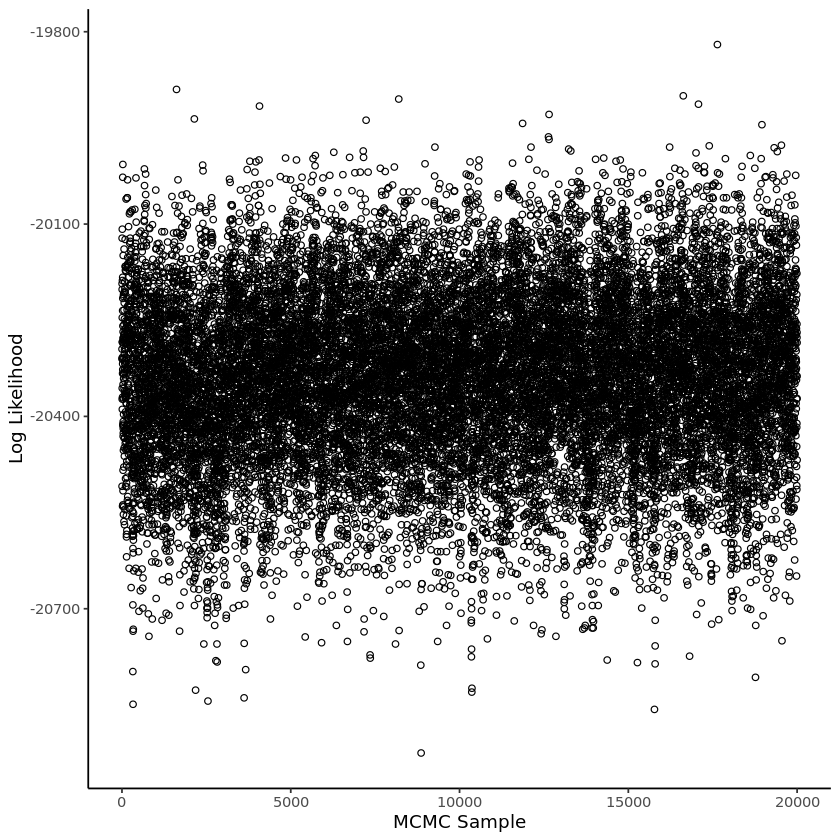

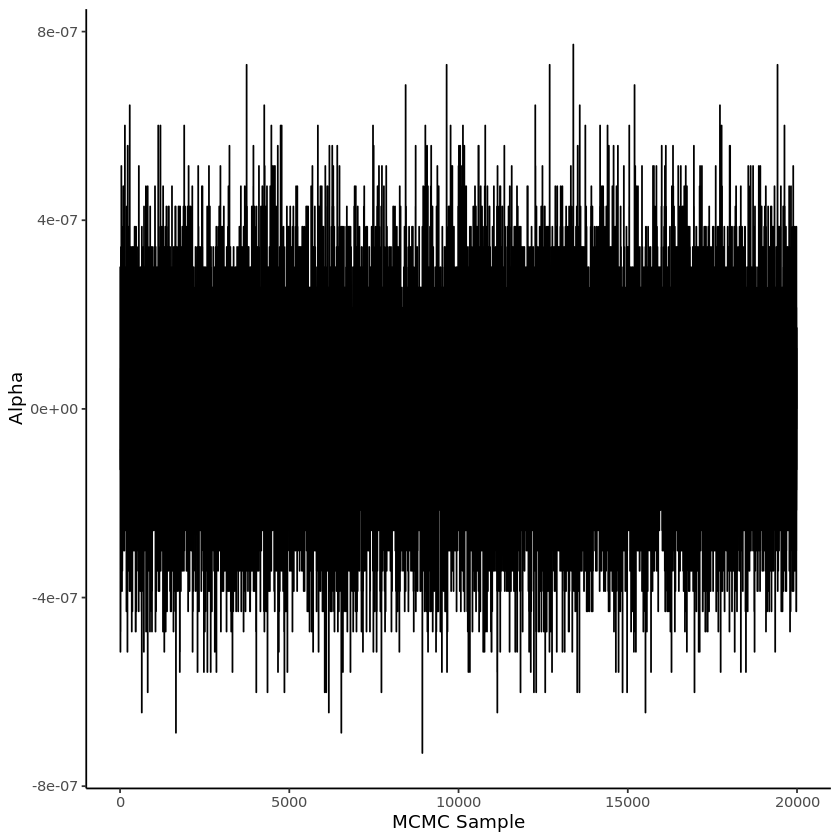

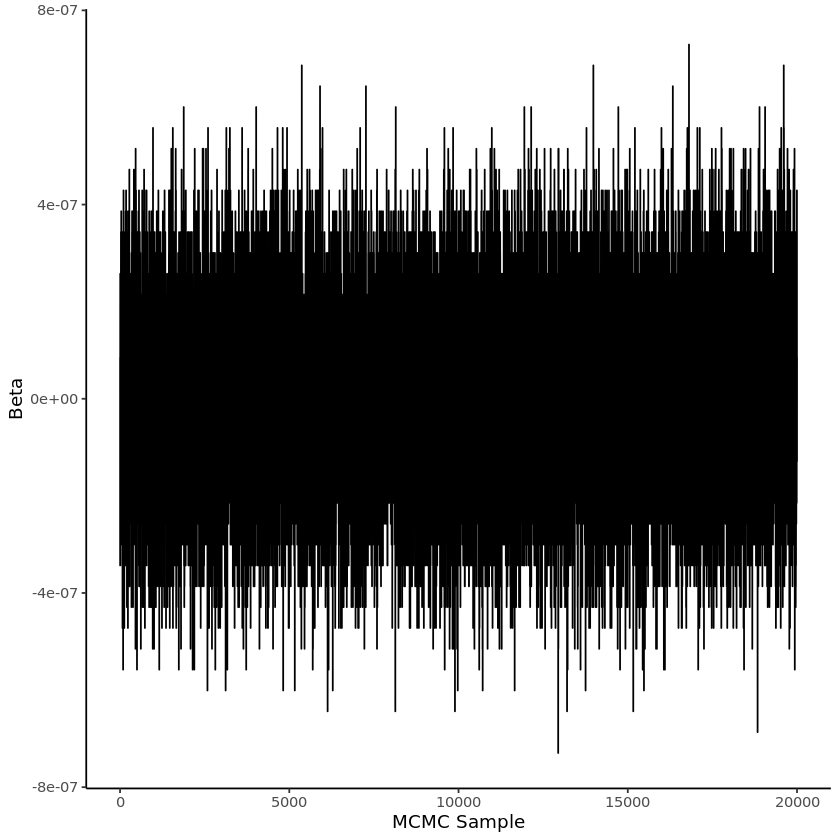

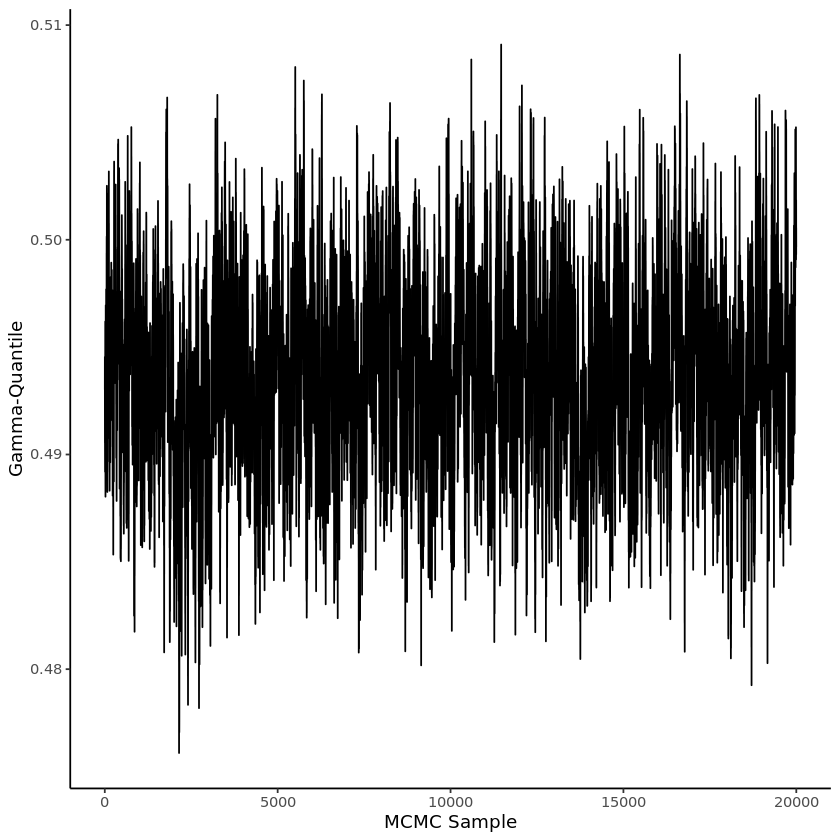

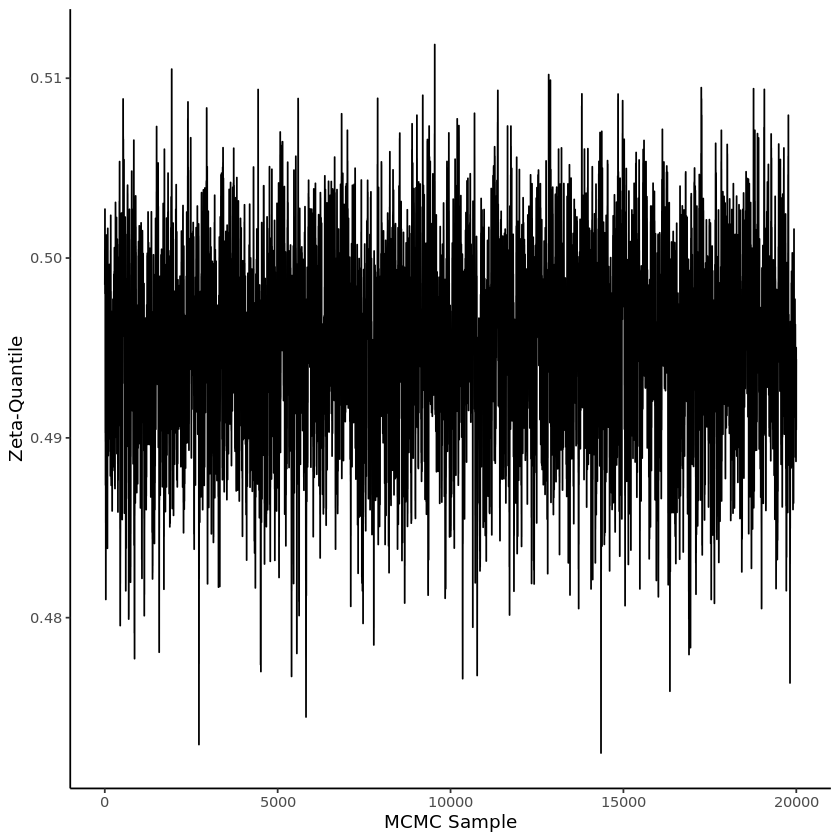

Saved trace plots to ./plots


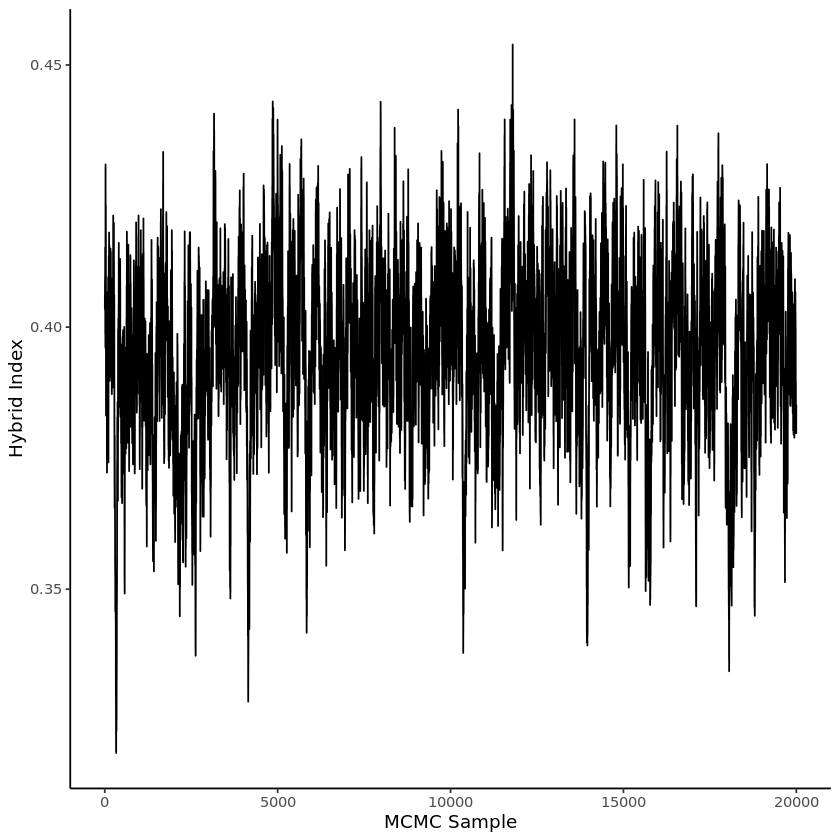

In [4]:
# Plot the likelihood and parameter traces
# showPLOTS=TRUE prints the plots to the screen
plot_traces(df.list = bgc.genes,
            prefix = prefix,
            plotDIR = plotDIR, showPLOTS=TRUE)

The runs seemed to have converged. The above traces contain aggregated samples for all five BGC runs. Runs that didn't converge would look more like the following:

<img src="img/bad_LnL_convergence.png" width="40%" height="40%" />

#### Thinning and Discarding Samples

You can clearly see here that the five runs didn't converge. If you notice that the runs start converging towards the end of the sampling, then our ```combine_bgc_output()``` R function provides options to thin or discard a user-specified number of samples.

Thinning will thin the output to every 2nd sample. Keep in mind that this is thinning the MCMC **samples**, not all the iterations. So if you had a total of 200,000 post-burnin iterations X 5 runs (i.e. 1,000,000 total iterations), and you told BGC to sample every 40 generations, you would end up with 5000 X 5 = 25,000 MCMC samples.

If you then used combine_bgc_output to thin every 2nd iteration, it would retain 12,500 MCMC samples. One reason to use this is if you have a ton of loci and you want to reduce the computational burden.

Another available option is to discard the first N MCMC samples as burn-in. Setting ```discard=2500``` will discard the first 2500 samples from **each run**. So if like in the previous example you had 25,000 MCMC samples, and you discarded 2500 from each of the five runs, you would end up with 12,500 MCMC samples. The difference here is that instead of taking every Nth sample, you are discarding the first N samples of each run. One reason to use this is if you notice that the runs converged, for example, 2500 samples post-burnin. In this case you could just discard the non-converged portions of the runs as burn-in.

Here are examples of each.



Loading input files with prefix eatt...



New names:
* V1 -> V1...1
* V3 -> V3...2
* V5 -> V5...3
* V7 -> V7...4
* V9 -> V9...5
* ...

New names:
* V1 -> V1...1
* V3 -> V3...2
* V5 -> V5...3
* V7 -> V7...4
* V9 -> V9...5
* ...

New names:
* V1 -> V1...1
* V3 -> V3...2
* V5 -> V5...3
* V7 -> V7...4
* V9 -> V9...5
* ...

New names:
* V1 -> V1...1
* V3 -> V3...2
* V5 -> V5...3
* V7 -> V7...4
* V9 -> V9...5
* ...

New names:
* V1 -> V1...1
* V3 -> V3...2
* V5 -> V5...3
* V7 -> V7...4
* V9 -> V9...5
* ...

New names:
* V1 -> V1...1
* V3 -> V3...2
* V5 -> V5...3
* V7 -> V7...4
* V9 -> V9...5
* ...





Every 2 sample being used because 
thin parameter was set. # MCMC samples = 10000


Done! Found 5 BGC runs.




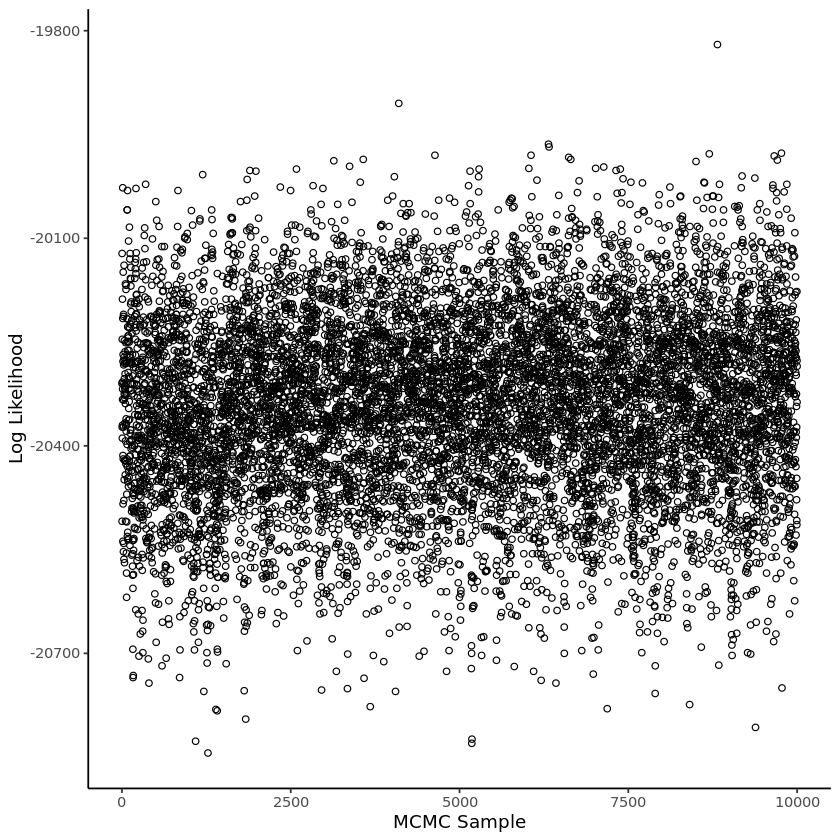

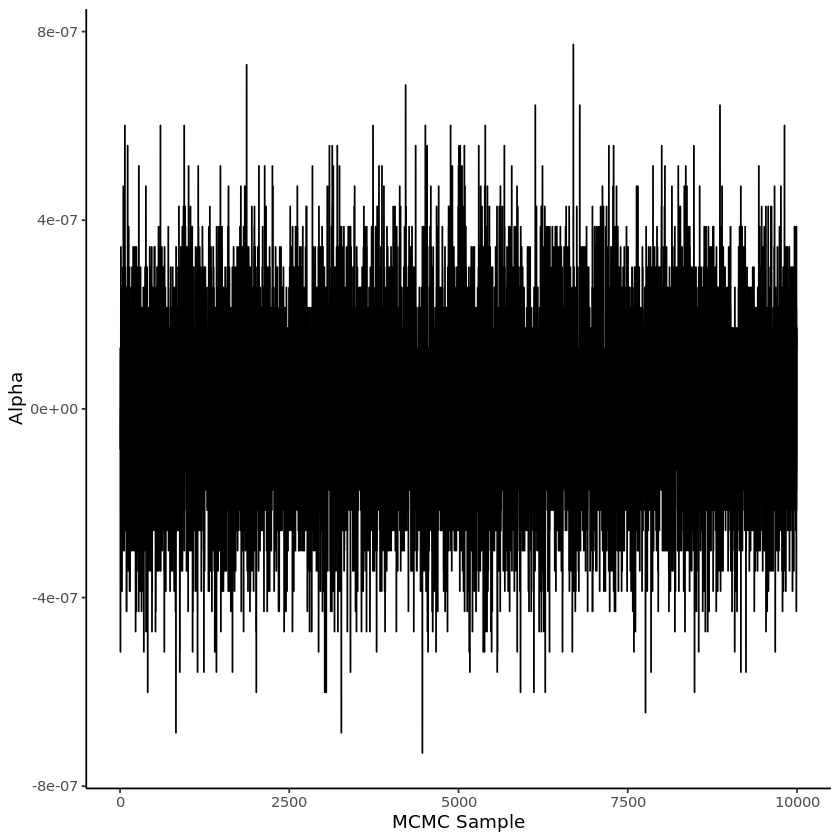

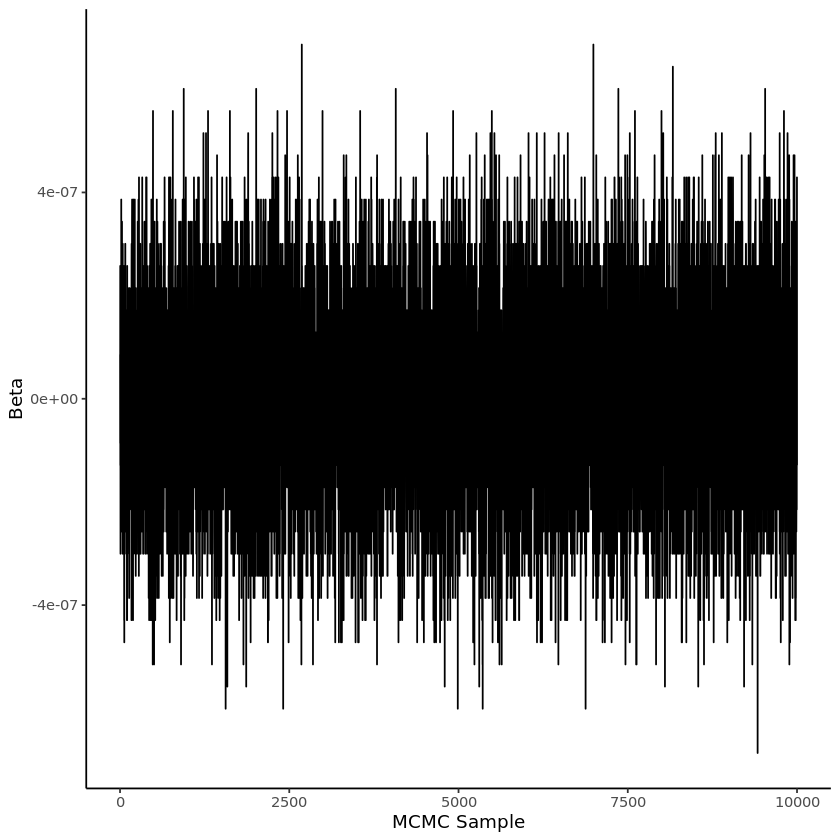

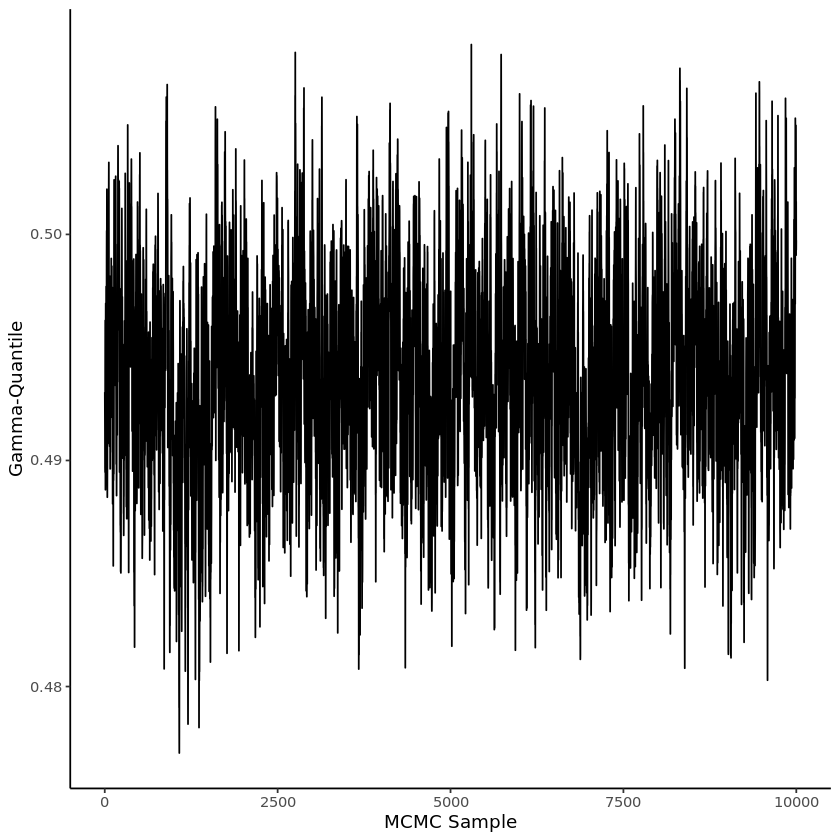

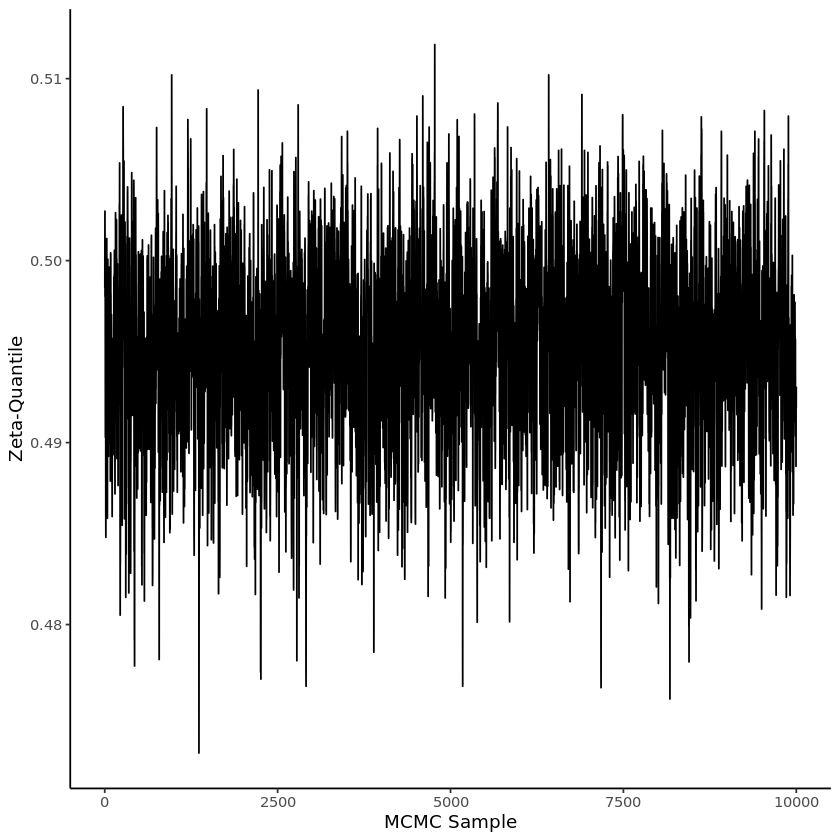

Saved trace plots to ./plots


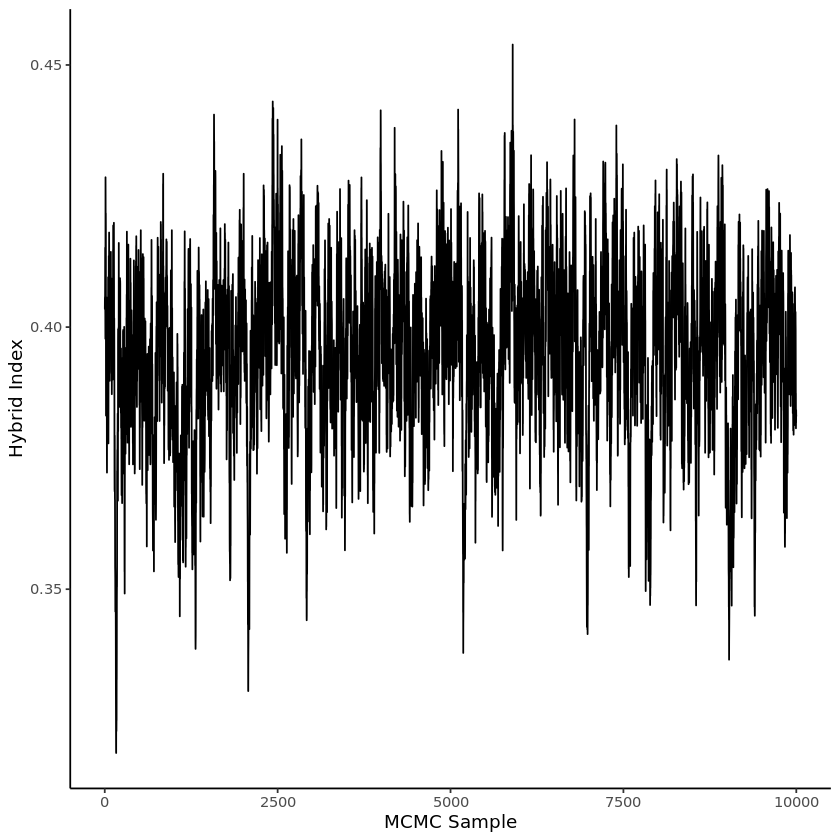

In [5]:
# Combine multiple independent BGC runs together
# Thin every nth sample
bgc.genes <-
  combine_bgc_output(results.dir = genesDIR,
                     prefix = prefix, thin=2)

# Plot the likelihood and parameter traces
# showPLOTS=TRUE prints the plots to the screen
plot_traces(df.list = bgc.genes,
            prefix = prefix,
            plotDIR = plotDIR, showPLOTS=TRUE)

Now let's try discarding samples. We'll discard the first 2000 samples from each run, leaving 10000 remaining samples.



Loading input files with prefix eatt...



New names:
* V2001 -> V2001...1
* V2002 -> V2002...2
* V2003 -> V2003...3
* V2004 -> V2004...4
* V2005 -> V2005...5
* ...

New names:
* V2001 -> V2001...1
* V2002 -> V2002...2
* V2003 -> V2003...3
* V2004 -> V2004...4
* V2005 -> V2005...5
* ...

New names:
* V2001 -> V2001...1
* V2002 -> V2002...2
* V2003 -> V2003...3
* V2004 -> V2004...4
* V2005 -> V2005...5
* ...

New names:
* V2001 -> V2001...1
* V2002 -> V2002...2
* V2003 -> V2003...3
* V2004 -> V2004...4
* V2005 -> V2005...5
* ...

New names:
* V2001 -> V2001...1
* V2002 -> V2002...2
* V2003 -> V2003...3
* V2004 -> V2004...4
* V2005 -> V2005...5
* ...

New names:
* V2001 -> V2001...1
* V2002 -> V2002...2
* V2003 -> V2003...3
* V2004 -> V2004...4
* V2005 -> V2005...5
* ...





The first 2000 samples of each run 
being discarded. # MCMC samples = 10000


Done! Found 5 BGC runs.




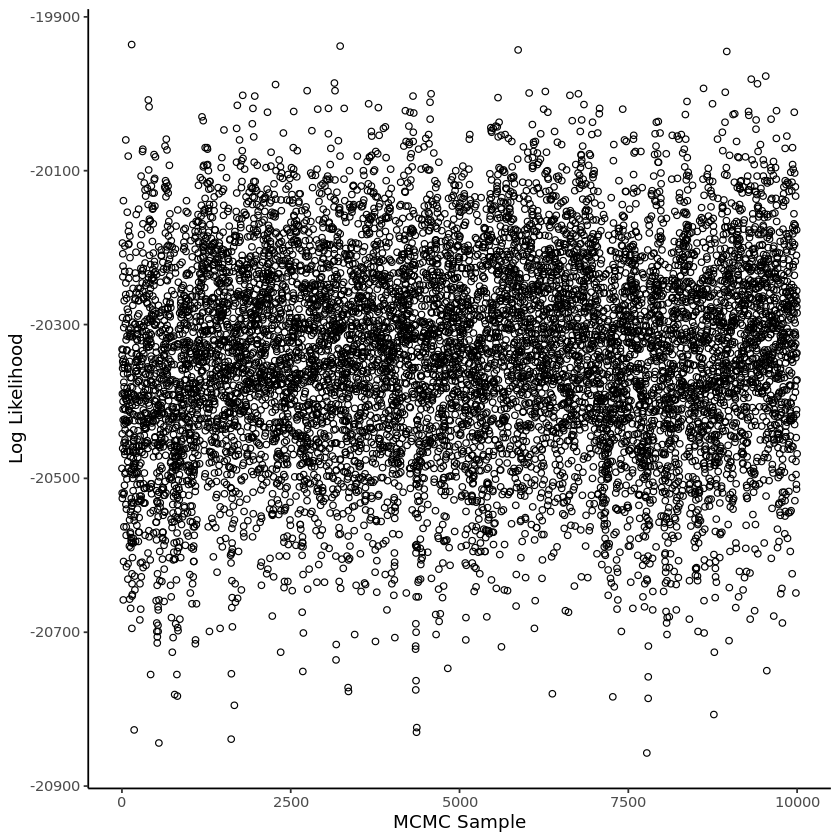

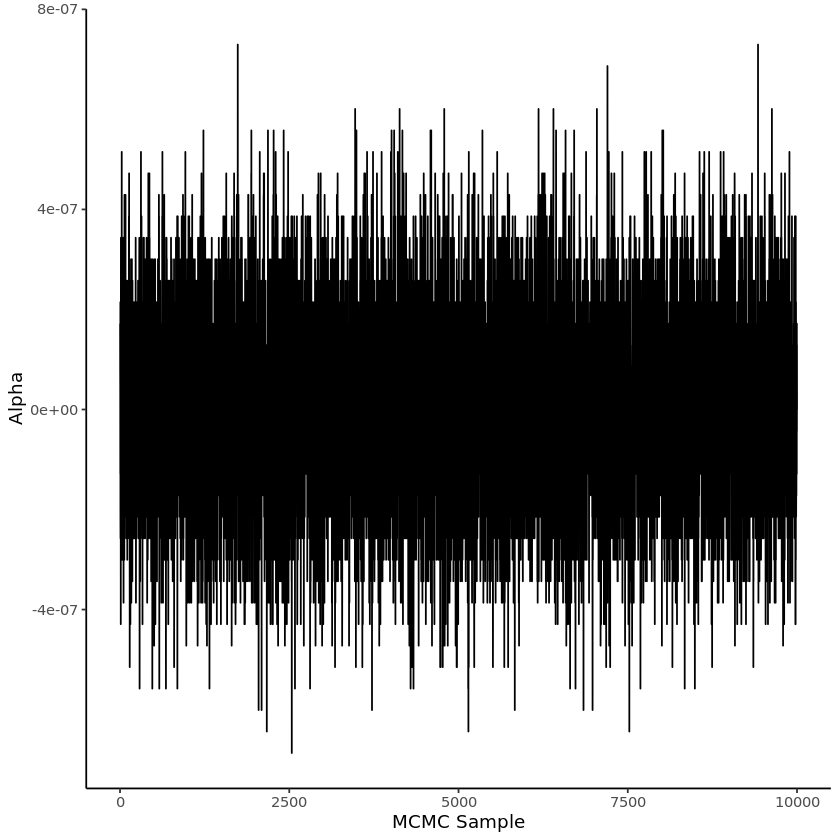

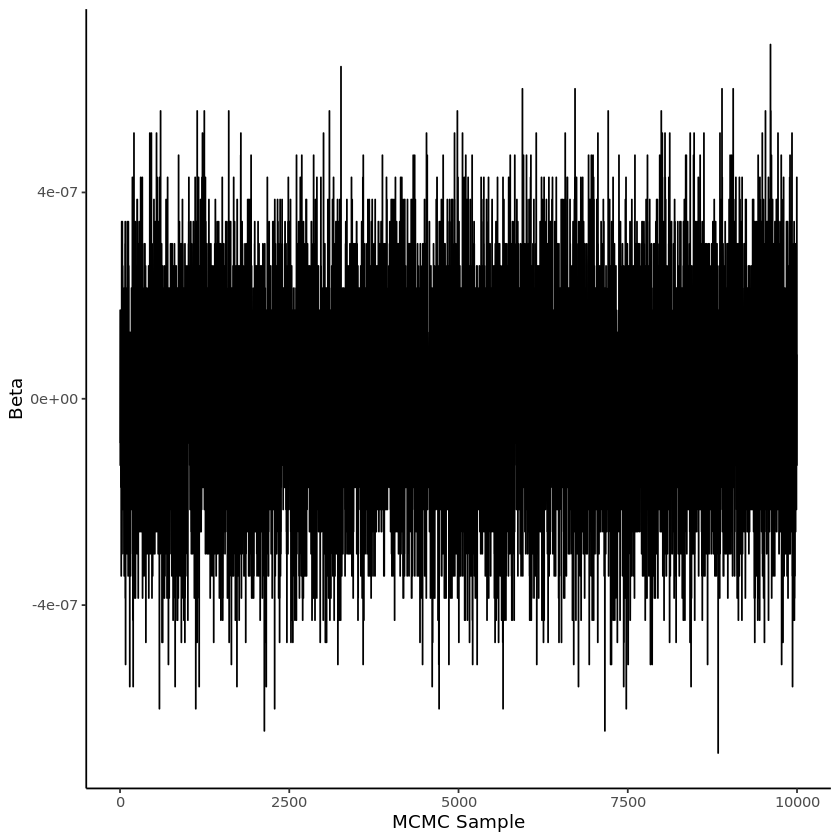

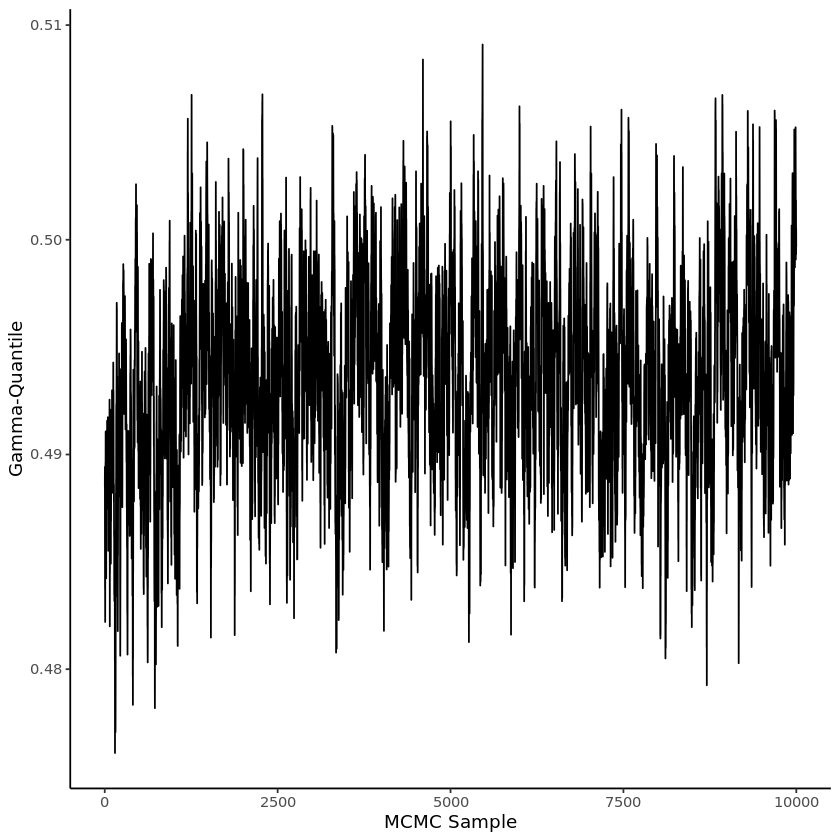

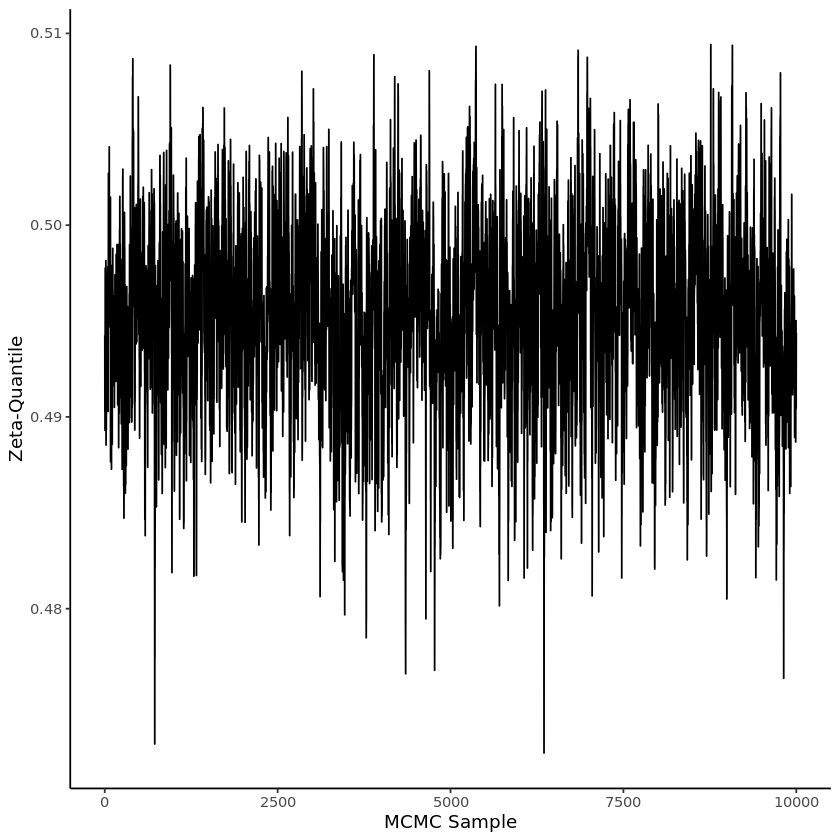

Saved trace plots to ./plots


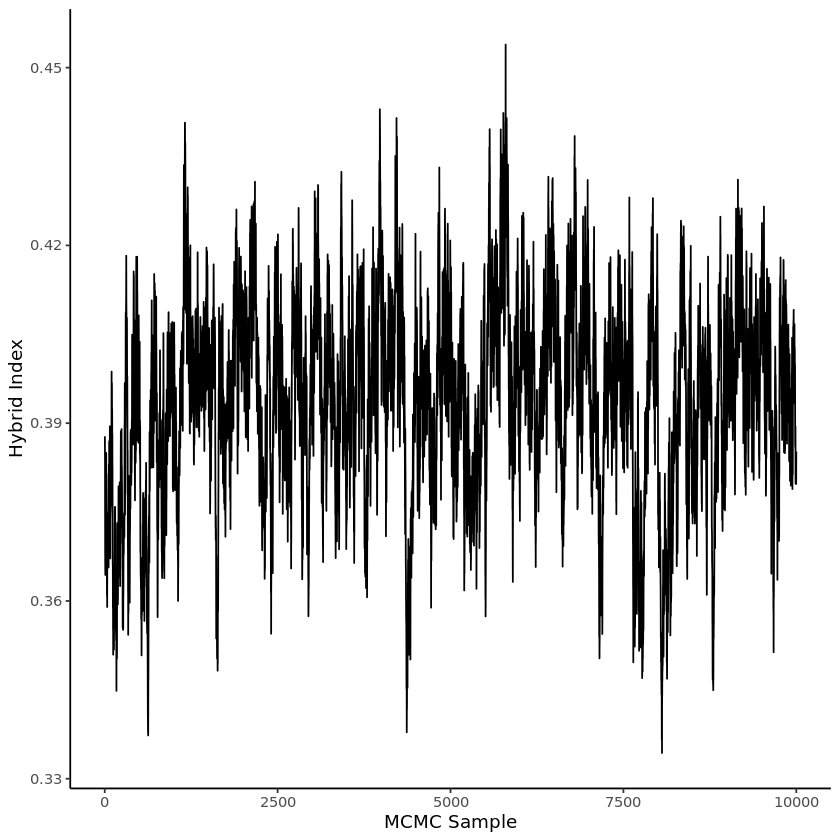

In [3]:
# Combine multiple independent BGC runs together
# Discard first N samples of each run
bgc.genes <-
  combine_bgc_output(results.dir = genesDIR,
                     prefix = prefix, discard=2000)

# Plot the likelihood and parameter traces
# showPLOTS=TRUE prints the plots to the screen
plot_traces(df.list = bgc.genes,
            prefix = prefix,
            plotDIR = plotDIR, showPLOTS=TRUE)

We'll go with this one. However, note that if you still can't get the runs to converge after discarding samples, you might need to re-run BGC with more burn-in and/or more MCMC samples.

#### Identify Outlier Loci

Next, we will use the BGC parameters (alpha, beta, hybrid indices, and the quantiles) to detect outliers. Alpha outliers indicate excess ancestry towards one parental type compared to what was expected, and beta outliers correspond to the rate of introgression, with steeper clines indicating a lower rate of introgression than expected and vice versa. Steep clines suggest that selection is reducing the amount of introgression that is occurring at that locus.

For identifying outlier loci, you need a population map file (VCF to BGC - Required Arguments - Population Map (Popmap) File section for more information). If you want to make the chromosome ideograms (see below), then you also need to supply a file path to ```loci.file```. However, if you don't care about the chromosome plots or haven't mapped your loci to a reference genome, then just leave ```loci.file=NULL```. It is not needed for the phiPlots or the alphaBeta plots and ```get_bgc_outliers()``` will spoof one for you.

You can then run our ```get_bgc_outliers``` function, which uses the object returned from ```combine_bgc_output()``` to detect outliers. ```get_bgc_outliers()``` records outliers in three ways.

1. If the credible interval for alpha or beta do not overlap zero.
2. If alpha or beta falls outside the quantile interval: qn / 2 and (1 - qn) / 2. This one is more conservative.
3. If both 1. and 2. are TRUE. This is the most conservative one.  

qn can be adjusted. The default is 0.975 as the upper interval bound. If you set the qn parameter to 0.95, the interval will be 0.95 / 2 and (1 - 0.95) / 2. The object returned from ```get_bgc_outliers()``` can be input directly into our ```phiPlot()``` function. You can save this function's output as an RDS object for later use by setting ```save.obj = TRUE```.

Let's run it.

In [5]:
gene.outliers <-
  get_bgc_outliers(
    df.list = bgc.genes, # object returned from combine_bgc_output()
    admix.pop = "EATT", # Admixed population
    popmap = "../data/exampleData/popmaps/bgc/eatt.bgc.popmap_final.txt", # popmap file path
    loci.file = "../data/exampleData/bgc/bgc_lociFiles/genes/eatt_bgc_loci.txt", # optional; loci file path; gets generated in vcf2bgc.py; optional (but required for ideograms)
    qn = 0.975)

### Scaffold-aligned Loci

Now we will repeat the above for the unplaced scaffold loci. Remember, this is not required if you don't want to make the chromosome ideograms below.



Loading input files with prefix eatt...



New names:
* V2001 -> V2001...1
* V2002 -> V2002...2
* V2003 -> V2003...3
* V2004 -> V2004...4
* V2005 -> V2005...5
* ...

New names:
* V2001 -> V2001...1
* V2002 -> V2002...2
* V2003 -> V2003...3
* V2004 -> V2004...4
* V2005 -> V2005...5
* ...

New names:
* V2001 -> V2001...1
* V2002 -> V2002...2
* V2003 -> V2003...3
* V2004 -> V2004...4
* V2005 -> V2005...5
* ...

New names:
* V2001 -> V2001...1
* V2002 -> V2002...2
* V2003 -> V2003...3
* V2004 -> V2004...4
* V2005 -> V2005...5
* ...

New names:
* V2001 -> V2001...1
* V2002 -> V2002...2
* V2003 -> V2003...3
* V2004 -> V2004...4
* V2005 -> V2005...5
* ...

New names:
* V2001 -> V2001...1
* V2002 -> V2002...2
* V2003 -> V2003...3
* V2004 -> V2004...4
* V2005 -> V2005...5
* ...





The first 2000 samples of each run 
being discarded. # MCMC samples = 10000


Done! Found 5 BGC runs.




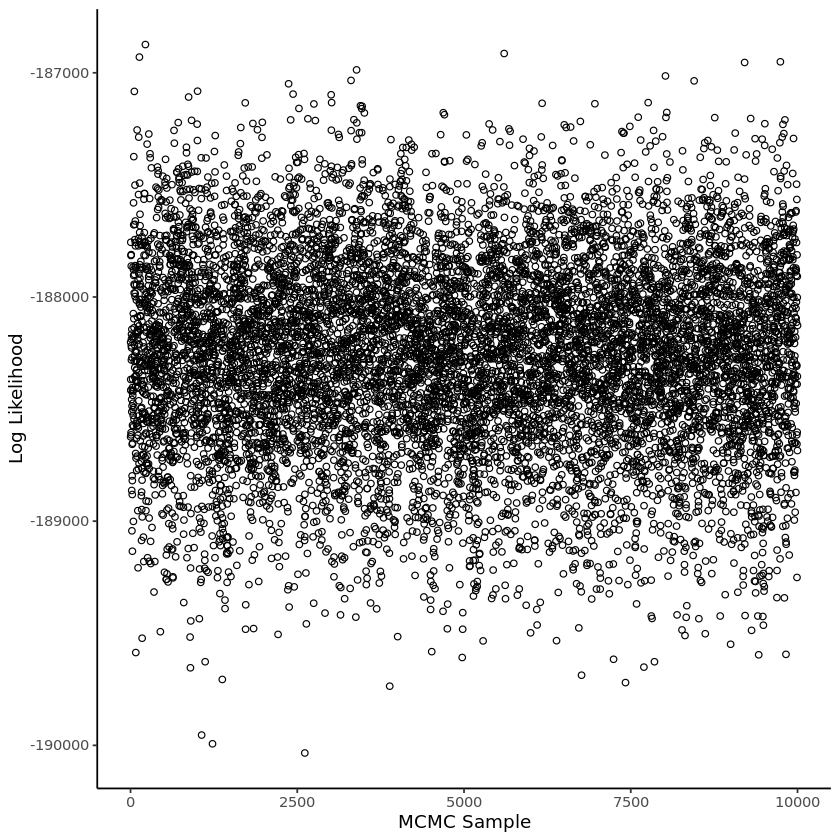

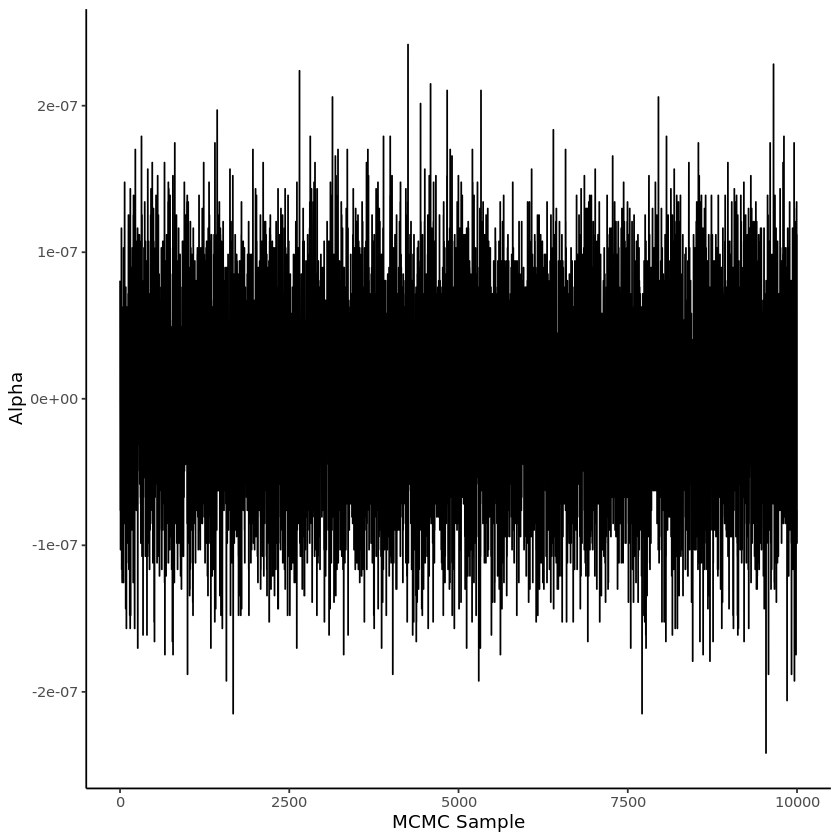

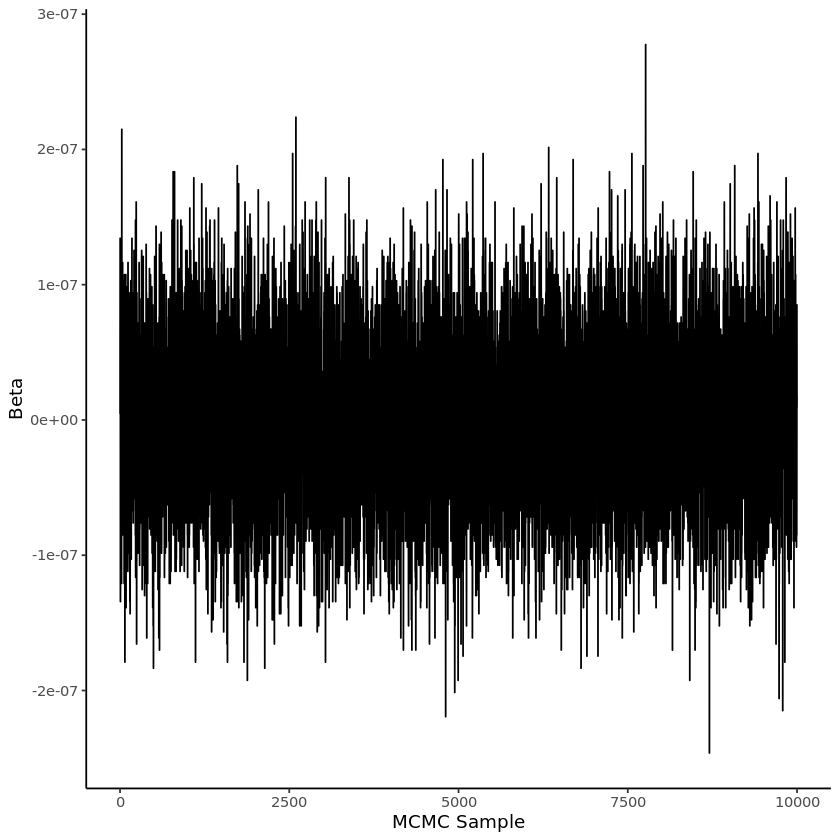

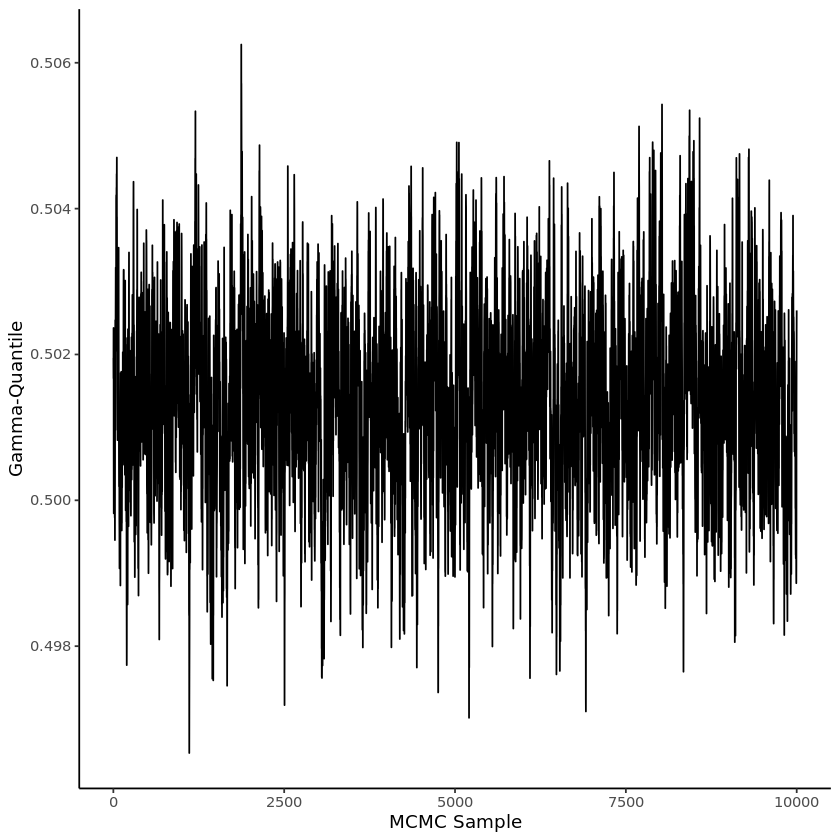

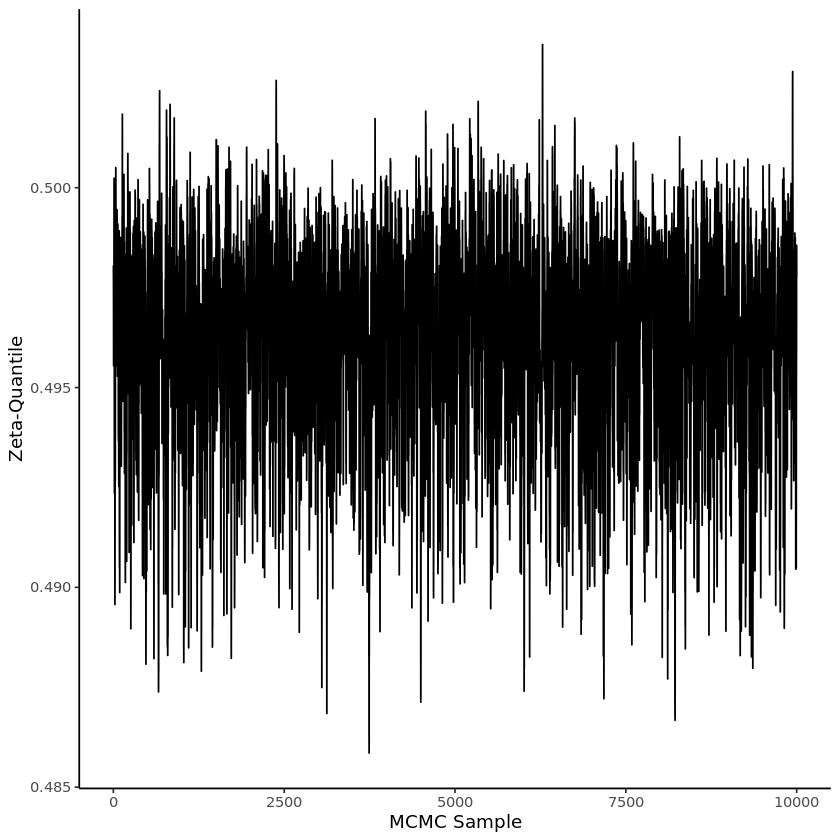

Saved trace plots to ./plots


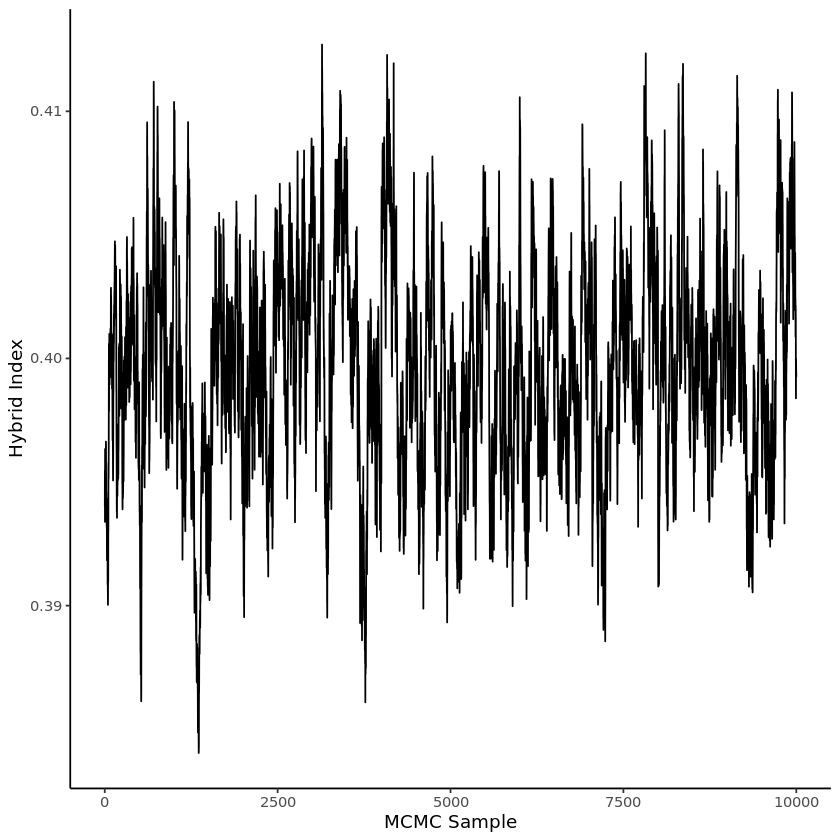

In [6]:
# Aggregate runs together
bgc.full <-
  combine_bgc_output(results.dir = fullDIR,
                     prefix = prefix, 
                     discard = 2000)

# Plot likelihood and parameter traces
plot_traces(
  df.list = bgc.full,
  prefix = paste0(prefix, "_full"),
  plotDIR = plotDIR,
  showPLOTS = TRUE
)

# Detect outliers in scaffold alignment
full.outliers <-
  get_bgc_outliers(
    df.list = bgc.full,
    admix.pop = admixPop,
    popmap = popmap,
    loci.file = full.loci.file
  )

### Phi Plots

#### Transcriptomic Loci

First, let's get the minimum and maximum alpha and beta values. This is not required to make the Phi Plots, and it isn't part of ClineHelpR, but it is useful for making legends later. 

In [7]:
# Not ClinePlotR functions.
# This just saves the minimum and maximum alpha and beta outlier values
# Can be used to add to the legend
ab.range <-
  data.frame(
    "full.alpha" = c(
      "min" = min(full.outliers[[1]]$alpha),
      "max" = max(full.outliers[[1]]$alpha)
    ),
    "full.beta" = c(
      "min" = min(full.outliers[[1]]$beta),
      "max" = max(full.outliers[[1]]$beta)
    ),
    "genes.alpha" = c(
      "min" = min(gene.outliers[[1]]$alpha),
      "max" = max(gene.outliers[[1]]$alpha)
    ),
    "genes.beta" = c(min(gene.outliers[[1]]$beta), max(gene.outliers[[1]]$beta))
  )

# Write alpha beta ranges to file.
write.table(
  data.frame("Header" = rownames(ab.range), ab.range),
  file = file.path(plotDIR, paste0(prefix, "_ab.ranges.csv")),
  sep = ",",
  row.names = F,
  col.names = T,
  quote = F
)

### Phi Plots (Transcriptomic) - Continued

Now let's make the Phi genomic cline plots! 

Most of the plot settings can be adjusted as needed. See ?phiPlot for more info.

The ```popname``` argument can be any string you want here.

If you want to save the plot to a file, just use the ```saveToFile``` option. If specified, the value should be the filename you want to save to. If you want to print them to your window or screen, you can use the ```showPLOTS=TRUE``` option.

You can change the criteria for identifying outlier loci with the ```overlap.zero```, ```qn.interval```, and ```both.outlier.tests``` options. By default, it is set to identify outliers using either ```overlap.zero``` or ```qn.interval```. I.e., it only has to meet at least one of the criteria. You can turn one or the other off if you want by setting ```overlap.zero = FALSE``` or ```qn.interval = FALSE```. They can't both be off unless ```both.outlier.tests = TRUE```.

If you set ```both.outlier.tests = TRUE```, it will require that outliers meet both criteria. This overrides overlap.zero and qn.interval settings and is a more conservative outlier test. There will be fewer outliers with both required.

used      (Mb)  gc trigger (Mb)   max used  (Mb)  
Ncells   2311995 123.5   4162831   222.4   4162831  222.4
Vcells 130651410 996.8 270275246  2062.1 270275230 2062.1

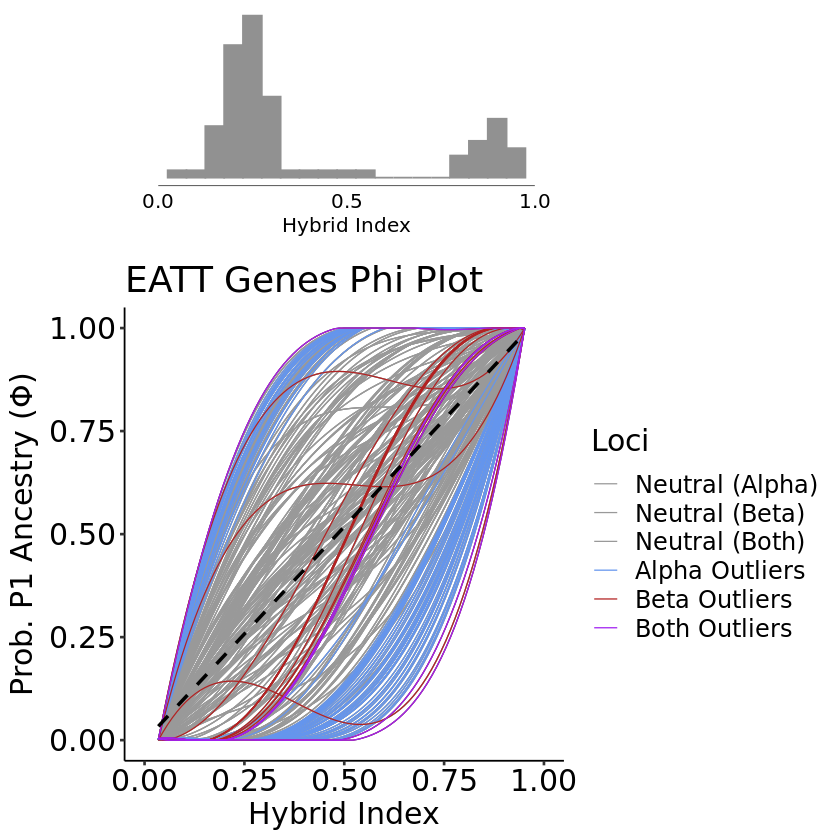

In [11]:
# Make the phi plot for the transcriptomic alignment
# Any of these parameters can be adjusted as needed.
# Here, both.outlier.tests is FALSE
# This means that outliers are flagged if they are significant in either method
phiPlot(
  outlier.list = gene.outliers,
  popname = paste0(admixPop, " Genes"),
  line.size = 0.35,
  saveToFile = paste0(prefix, "_genes"),
  plotDIR = plotDIR,
  showPLOTS = TRUE,
  both.outlier.tests = FALSE,
  neutral.color = "gray60",
  alpha.color = "cornflowerblue",
  beta.color = "firebrick",
  both.color = "purple",
  hist.y.origin = 1.2,
  hist.height = 1.8,
  margins = c(160.0, 5.5, 5.5, 5.5),
  hist.binwidth = 0.05
)

And there is your Phi Plot! Let's try it with ```both.outlier.tests = TRUE```.



both.outlier.tests is set.
Ignoring overlap.zero qn.interval settings







Try setting both.outlier.tests to FALSE


used      (Mb)  gc trigger (Mb)   max used  (Mb)  
Ncells   2313167 123.6   4162831   222.4   4162831  222.4
Vcells 130652819 996.9 270275246  2062.1 270275230 2062.1

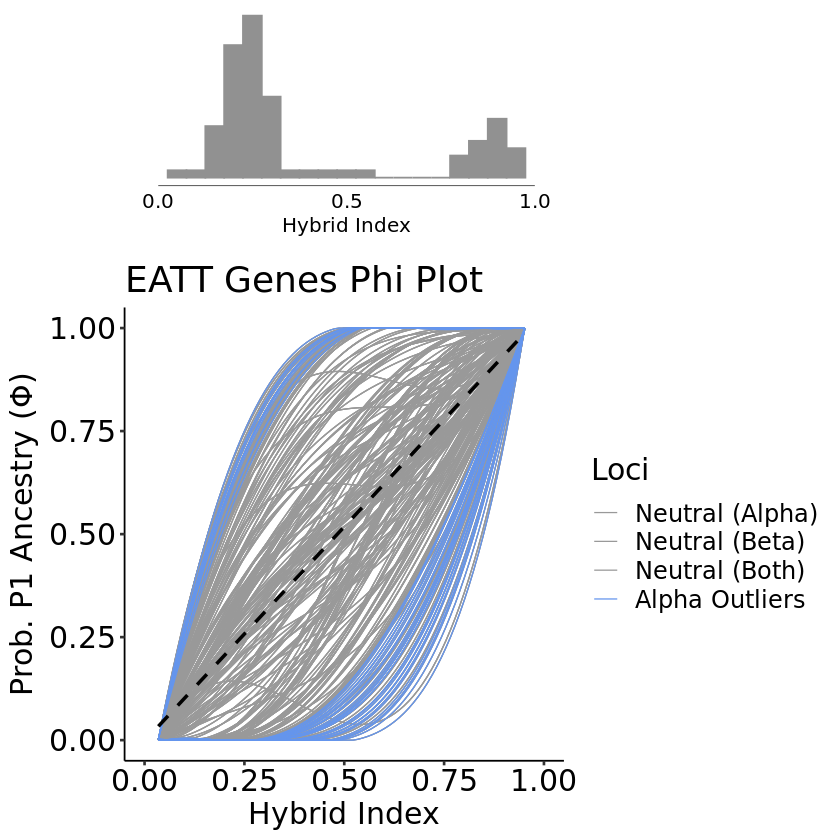

In [12]:
# Here both.outlier.tests is TRUE
# This means that both outlier tests have to be significant to flag the outlier
phiPlot(
  outlier.list = gene.outliers,
  popname = paste0(admixPop, " Genes"),
  line.size = 0.35,
  saveToFile = paste0(prefix, "_genes_bothOutlierTests"),
  plotDIR = plotDIR,
  showPLOTS=TRUE,
  both.outlier.tests = TRUE,
  neutral.color = "gray60",
  alpha.color = "cornflowerblue",
  beta.color = "firebrick",
  both.color = "purple",
  hist.y.origin = 1.2,
  hist.height = 1.8,
  margins = c(160.0, 5.5, 5.5, 5.5),
  hist.binwidth = 0.05
)

You can see that when ```both.outlier.tests = TRUE```, it is more conservative and no beta outliers were found.

#### Scaffold Dataset Phi Plot

Now let's do it for the scaffold dataset.

used      (Mb)   gc trigger (Mb)   max used  (Mb)  
Ncells   3002467  160.4   5167875   276.0   5167875  276.0
Vcells 138064693 1053.4 270275246  2062.1 270275230 2062.1

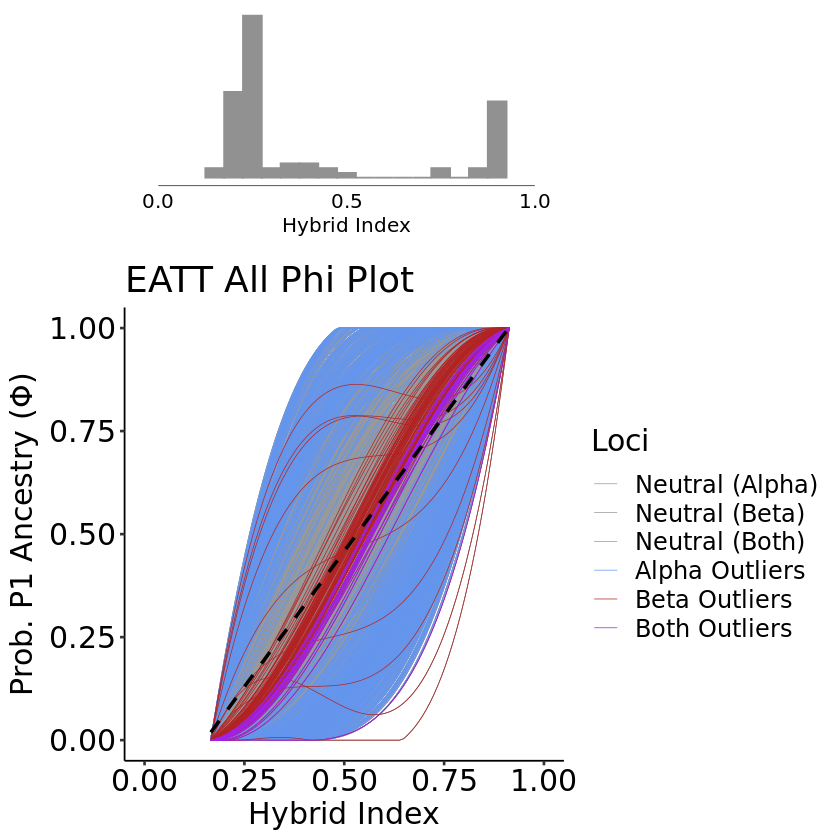

In [13]:
# Phi plot for scaffold alignment
phiPlot(
  outlier.list = full.outliers,
  popname = paste0(admixPop, " All"),
  line.size = 0.2,
  saveToFile = paste0(prefix, "_scaffold"),
  plotDIR = plotDIR,
  showPLOTS = TRUE,
  both.outlier.tests = FALSE,
  neutral.color = "gray60",
  alpha.color = "cornflowerblue",
  beta.color = "firebrick",
  both.color = "purple",
  hist.y.origin = 1.2,
  hist.height = 1.8,
  margins = c(160.0, 5.5, 5.5, 5.5),
  hist.binwidth = 0.05
)

There were many more loci for the scaffold-aligned dataset, so it makes sense that there were also more outliers.

### alphaBeta Plot

Using the output from above, you can also create the Alpha X Beta 2-D contour plot. The plot will have polygon hulls around the outlier space. As with the phiPlot function, either or both of the outlier tests can be used to classify outliers. Many of the plot features are also customizable, such as margins, colors, etc.  

If the contours go off the plot space, adjust the padding parameter.

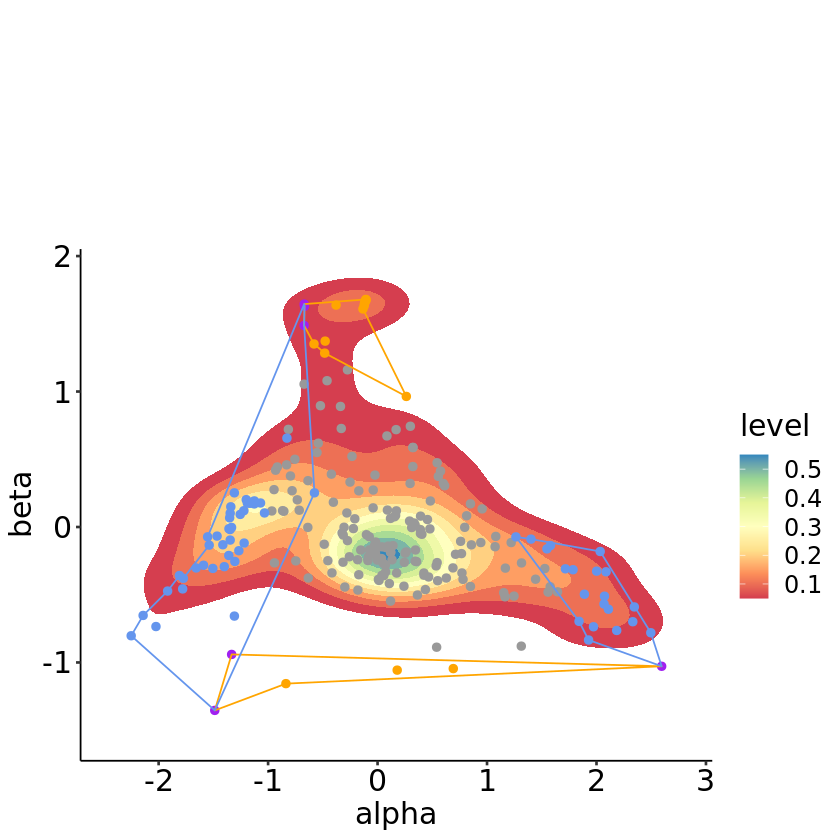

In [14]:
# alphabetaplot
# 2-D contour plot with hulls for outliers
alphaBetaPlot(
  gene.outliers,
  alpha.color = "cornflowerblue",
  beta.color = "orange",
  neutral.color = "gray60",
  saveToFile = prefix,
  plotDIR = "./plots",
  showPLOTS = TRUE,
  padding = 0.2,
)

In the plot above, each point is a locus, and the polygons are the hulls that depict the outlier loci. Alpha outliers are blue, and beta outliers are orange, neutral loci are gray, and outliers for both alpha and beta are purple. 

### Chromosome Plots (Ideograms)

**Important:** If you want to make the ideogram plots, you will need to run BGC and the previous R functions twice: Once for SNPs aligned only to your study organism's (or a very close relative's) transcriptome, and a second time for all genome-wide loci (i.e. unplaced scaffolds). The transcriptome loci names should have the GenBank Transcript IDs (as found in the GFF file), and the scaffold-aligned loci should have scaffold IDs as the locus names.

For this part, you need a closely related reference genome that is assembled at the chromosome-level. 

Second, your model organism needs to have at least a scaffold-level genome and a transcriptome available. You will also need a GFF file for the annotations.

**If you don't have all of those, you won't be able to do the chromosome plot.**

#### Map scaffold-level Assembly to a Reference Genome.

To convert scaffold coordinates to chromosome coordinates, you will need to map the scaffold-level assembly of your study organism to a closely related chromosome-level assembly.

First, some *a priori* analyses need to be run.

#### Minimap2

You need to use [minimap2](https://github.com/lh3/minimap2) (Li, 2018) for this part. 

1. To map the assembly data to the reference genome, name the reference chromosomes in a fasta file something like "chr1", "chr2", etc. The important thing is that they have a string prefix and an integer at the end. This will be important downstream.

2. Remove unplaced scaffolds from the reference genome's fasta file.

3. Concatenate the reference fasta files (scaffold and transcriptome) into one file. 
  + In bash, this can be done like ```cat scaffolds.fasta transcriptome.fasta > query.fasta```

4. Run minimap2. Tested with minimap2 v2.17.  
  + Example command: 
  + ```minimap2 --cs -t 4 -x asm20 -N 100 ref.fasta query.fasta > refmap_asm20.paf```  
  + This will map the query scaffold/transcriptome loci to the reference genome. 
  + You will want to adjust asm20 to suit how closely related your reference genome is to your study organism. asm 20 is suitable if the average sequence divergence is ~10%, and it allows up to 20% divergence. asm10 is suitable for 5% average, allowing up to 10%. asm5 is for average divergence of a few percent and up to 5%. 


5. Save the minimap2 output as a paf file (default in minimap2).  

#### PAFScaff

6. Next, run [PAFScaff](https://github.com/slimsuite/pafscaff)  
  + PAFScaff cleans up and improves the mapping.  
  + One of the output files from PAFScaff will be required to make the chromosome plot.  
  + **Important**: When running PAFScaff, set the following options: ```refprefix=ref_chromosome_prefix, newprefix=query, unplaced=unplaced_ and sorted=RefStart```
  + E.g.,  
  + ```python pafscaff.py pafin=refmap_asm20.paf basefile=refmap_asm20_pafscaff reference=ref.fasta assembly=query.fasta refprefix=chr newprefix=query unplaced=unplaced_ sorted=RefStart forks=2```  
  + Adjust the ```forks``` option to how many CPU cores you have available.  
  
  + Once PAFScaff is done running, you can move on with the chromosome plots.

#### Make Chromosome Plots

**These steps assume you have run BGC, combine_bgc_output() and get_bgc_outliers() for both transcriptome loci and genome-wide (i.e., unplaced scaffolds) loci.**  

Now you can make the chromosome plot (ideogram). You'll need the GFF file for your reference genome/ transcriptome. The GFF file will be used with the ```parseGFF()``` ClineHelpR function. 

In [15]:
gff <- parseGFF(gff.filepath = gffFile)

Warning message in dplyr::data_frame(attr = stringr::str_split(g$attr, ";"), order = 1:nrow(g)) %>% :
"Found CDS or exon with illegal parent"


Now to join the GFF data with the transcriptome dataset's transcript IDs.

The scafInfoDIR parameter allows you to save the annotated output (e.g. with gene names) to this directory. If it doesn't exist, it will be created.

In [16]:
genes.annotated <-
  join_bgc_gff(prefix = "eatt",
               outlier.list = gene.outliers,
               gff.data = gff, # Object from parseGFF()
               scafInfoDIR = scafInfoDIR)



Outlier genes matching to GFF genes:


 [1] "SYPL2"        "PGF"          "ZFP36L2"      "SASH3"        "ELOC"        
 [6] "FAM89B"       "RBBP8NL"      "LOC112107152" "FASN"         "RETREG2"     
[11] "HOXB2"        "SLC2A10"      "PEAK1"        "LRATD2"       "FBLN7"       
[16] "SH2D4A"       "EFCAB8"       "PNPLA2"       "CFAP54"       "ADAMTS12"    
[21] "TMEM8A"       "HELZ2"        "LOC113406769" "LOC113406865" "LOC112104248"
[26] "TIMP2"        "CUNH8orf58"   "FAM135B"     


#### Plot Ideograms

To plot the ideogram, you need the:

+ genome-wide outliers
+ annotated transcriptome data from the ```parseGFF() function```
+ &ast;.scaffolds.tdt output file from PAFScaff. See the exampleData/PAFScaff/pafscaff_asm20_scafTrans_tscripta.scaffolds.tdt file for an example.

The ideogram aligns the start and end coordinates in the PAFScaff output and GFF file and plots the alpha and beta BGC outliers on the reference genome's chromosome positions. It plots each chromosome twice, once with the alpha outliers and once with beta. The bands represent genes found in the transcriptome and their physical location on the reference genome's chromosomes.

Let's make the plot, now that you should have all the R objects and data.

In [17]:
# Only saves to file. Won't print to screen.
plot_outlier_ideogram(
  prefix = "eatt",
  outliers.genes = genes.annotated, # transcriptomic dataset
  outliers.full.scaffolds = full.outliers, # scaffold dataset
  pafInfo = pafInfoFile, # This is the PAFScaff output file
  plotDIR = plotDIR
)

TranscriptId X.CHROM        POS  alpha      beta        alpha.excess
1  XM_024192634 XM_024192634.2 2140 -0.6674684  1.62922630 neg         
2  XM_024192715 XM_024192715.1  388 -2.0243177 -0.73464972 neg         
3  XM_024194028 XM_024194028.2 3391 -1.3329909 -0.94046990 neg         
4  XM_024197210 XM_024197210.1 1339 -0.4787973  1.37199281 NA          
5  XM_024197649 XM_024197649.2 3377 -1.3463790 -0.09633047 neg         
6  XM_024198797 XM_024198797.2  796 -0.5766365  0.25227369 neg         
7  XM_024199037 XM_024199037.2  926 -1.3574447 -0.01257007 neg         
8  XM_024200738 XM_024200738.1  821  0.6917870 -1.04503162 NA          
9  XM_024203161 XM_024203161.1 2501 -1.4872100 -1.35358040 neg         
10 XM_024203729 XM_024203729.2 5331  2.1846482 -0.76354042 pos         
11 XM_024203742 XM_024203742.1 1160 -1.7740847 -0.37883168 neg         
12 XM_024204444 XM_024204444.2  573 -1.5048287 -0.30562830 neg         
13 XM_024205398 XM_024205398.2 5759 -1.3406949  0.14927044 neg         
14 XM_024209604 XM_024209604.1 1065  1.5472685 -0.16146252 pos         
15 XM_024213940 XM_024213940.2   68 -1.5381221 -0.13376252 neg         
16 XM_024214694 XM_024214694.1 2296 -1.1994928  0.20199203 neg         
17 XM_024215444 XM_024215444.1 3269  2.0687867 -0.56842256 pos         
18 XM_024216470 XM_024216470.1 2476 -0.8371401 -1.15601956 NA          
19 XM_026649001 XM_026649001.1  710 -1.7805770 -0.45689791 neg         
20 XM_026649042 XM_026649042.1 5888 -1.2188181 -0.11853434 NA          
21 XM_026650827 XM_026650827.1  999 -0.6707978  1.48715446 neg         
22 XM_026652820 XM_026652820.1 3566  1.8893587 -0.49608657 NA          
23 XM_026653429 XM_026653429.1  326 -0.1199458  1.64664257 NA          
24 XM_026653659 XM_026653659.1  786 -1.3039678 -0.25423306 NA          
25 XM_026653875 XM_026653875.1 3079 -1.0692691  0.17726422 NA          
26 XM_026654394 XM_026654394.1  639 -1.9178334 -0.47267490 neg         
27 XM_026657405 XM_026657405.1 1243  2.5952346 -1.02789992 pos         
28 XM_026659287 XM_026659287.1 2978 -1.1454580  0.18325691 NA          
   beta.excess alpha.outlier beta.outlier crazy.a ... RefEnd    RefMap  
1  pos         NA            NA           FALSE   ... 137833279 Placed  
2  NA          neg           NA            TRUE   ...  42399067 Placed  
3  NA          neg           neg           TRUE   ...  36763297 Placed  
4  pos         NA            NA           FALSE   ...  42793961 Placed  
5  NA          neg           NA            TRUE   ... 227957508 Placed  
6  NA          NA            NA           FALSE   ...  32996992 Placed  
7  NA          neg           NA            TRUE   ...   7732124 Anchored
8  NA          NA            neg          FALSE   ...  85783035 Placed  
9  NA          neg           neg           TRUE   ...  35124947 Placed  
10 NA          pos           NA            TRUE   ...    383234 Placed  
11 NA          neg           NA            TRUE   ...  10576685 Placed  
12 NA          neg           NA            TRUE   ...  18726512 Placed  
13 NA          neg           NA            TRUE   ...  49654574 Placed  
14 NA          NA            NA           FALSE   ... 263348997 Placed  
15 NA          neg           NA            TRUE   ...   3468708 Placed  
16 NA          neg           NA            TRUE   ...   8750293 Placed  
17 NA          pos           NA            TRUE   ...   1775927 Anchored
18 NA          NA            neg          FALSE   ... 109961018 Placed  
19 NA          neg           NA            TRUE   ...  81866961 Placed  
20 NA          neg           NA           FALSE   ...  21424689 Placed  
21 pos         NA            NA           FALSE   ...  31720911 Placed  
22 NA          pos           NA           FALSE   ...   3588793 Anchored
23 pos         NA            NA           FALSE   ... 117190359 Placed  
24 NA          neg           NA           FALSE   ... 293440721 Placed  
25 NA          neg           NA           FALSE   ...  43510962 Placed  
26 NA          ne

If some chromosomes didn't have any outliers on them, they might not get plotted. If that's the case, you can use the missing.chrs and miss.chr.length arguments to include them. You just need their names in a vector and a vector of each chromosome's length (in base pairs). Like so:

```
plot_outlier_ideogram(
  prefix = "eatt",
  outliers.genes = genes.annotated,
  outliers.full.scaffolds = full.outliers,
  pafInfo = "exampleData/PAFScaff/pafscaff_asm20_scafTrans_tscripta.scaffolds.tdt", # This is the PAFScaff output file
  plotDIR = "exampleData/bgc/bgcPlotter_output",
  missing.chrs = c("chr11", "chr21", "chr25"), # If some chromosomes didn't have anything aligned to them
  miss.chr.length = c(4997863, 1374423, 1060959) # lenghts (in bp) of chromosomes from missing.chrs

)
``` 

This plot gets saved as an SVG file in ```plotDIR``` and by default a PDF file (saved in the current working directory). But you can change the PDF output to PNG or JPG if you want. See ```?plot_outlier_ideogram```.

You can also adjust the colors and the band sizes. The bands by default are set much larger than the one base pair SNP position for better visualization and clarity. If you want to make them larger or smaller for the genes and/or the unplaced scaffolds, you can. And you can adjust the colors of the alpha and beta bands separately by specifying a character vector of colors (Rcolorbrewer or hex code) to the colorset1 (alpha) and colorset2 (beta) parameters.  E.g., 

```
plot_outlier_ideogram(
                      prefix = "eatt",
                      outliers.genes = genes.annotated,
                      outliers.full.scaffolds = full.outliers,
                      pafInfo = "exampleData/PAFScaff/pafscaff_asm20_scafTrans_tscripta.scaffolds.tdt", # This is the PAFScaff output file
                      plotDIR = "exampleData/bgc/bgcPlotter_output",
                      gene.size = 100000, # adjust size of known gene bands
                      other.size = 50000, # adjust size of unplaced scaffold bands
                      convert_svg = "png", # save as png instead of pdf
                      colorset1 = c("orange", "white", "green"), # alpha heatmap color range
                      colorset2 = c("red", "white", "blue") # beta heatmap color range
)
```  

Many of the arguments have default options if you don't want to mess with it. See ```?plot_outlier_ideogram```.  

Here is the final plot we used in Martin et al. (2020):

```
plot_outlier_ideogram(
                      prefix = "eatt",
                      outliers.genes = genes.annotated,
                      outliers.full.scaffolds = full.outliers,
                      pafInfo = "exampleData/PAFScaff/pafscaff_asm20_scafTrans_tscripta.scaffolds.tdt", # This is the PAFScaff output file
                      plotDIR = "exampleData/bgc/bgcPlotter_output",
                      gene.size = 4e6, # adjust size of known gene bands
                      other.size = 1e6, # adjust size of unplaced scaffold bands)
```

<img src="img/ideogram_EATT.png" width="50%" height="50%" />  

**References:**

Gauthier J., de Silva D.L., Gompert Z., Whibley A., Houssin C., Le Poul Y., McClure, M., Lemaitre, C., Legeai, F., Mallet, J., Elias, M. 2020. Contrasting genomic and phenotypic outcomes of hybridization between pairs of mimetic butterfly taxa across a suture zone. Molecular Ecology, 29: 1328–1343.

Gompert Z., Buerkle C.A.. 2009. A powerful regression-based method for admixture mapping of isolation across the genome of hybrids. Molecular Ecology, 18: 1207–1224.

Gompert, Z., Buerkle, C.A. 2010. INTROGRESS: A software package for mapping components of isolation in hybrids. Molecular Ecology Resources, 10(2): 378-384.

Gompert Z., Buerkle C.A. 2011. Bayesian estimation of genomic clines. Molecular Ecology, 20: 2111–2127.

Gompert Z., Buerkle C.A. 2012. BGC: Software for Bayesian estimation of genomic clines. Molecular Ecology Resourses, 12: 1168–1176.

Gompert Z., Lucas L.K., Nice C.C., Fordyce J.A., Forister M.L., Buerkle C.A. 2012. Genomic regions with a history of divergent selection affect fitness of hybrids between two butterfly species. Evolution, 66: 2167–2181.

Gompert Z., Parchman T.L., Buerkle C.A. 2012. Genomics of isolation in hybrids. Philosophical Transactions of the Royal Society B Biological Sciences. 367: 439–450.

Gompert Z., Mandeville E.G., Buerkle CA. 2017. Analysis of population genomic data from hybrid zones. Annual Review of Ecology & Evolution, 48: 207–229.

Hao, Z., Lv, D., Ge, Y., Shi, J., Weijers, D., Yu, G., Chen, J. 2020. RIdeogram: Drawing SVG graphics to visualize and map genome-wide data on the idiograms. PeerJ Computer Science, 6: e251.

Li, H. 2018. Minimap2: Pairwise alignment for nucleotide sequences. Bioinformatics, 34(18): 3094-3100.

Martin, B.T., Douglas, M.R., Chafin, T.K., Placyk, J.S. Jr., Birkhead, R.D., Phillips, C.A., Douglas, M.E. 2020. Contrasting signatures of introgression in North American box turtle (*Terrapene* spp.) contact zones. Molecular Ecology, 29(21): 4186-4202.